In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from imblearn.over_sampling import SMOTE
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

from scipy import stats
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.cluster import DBSCAN

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb
import lightgbm as lgb
from sklearn.ensemble import AdaBoostClassifier

from sklearn.model_selection import GridSearchCV

# Read Data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
PATH = '/content/drive/MyDrive/Colab Notebooks/data'
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv(PATH + '/dataset.csv')
df.sample(3)

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,Father's occupation,Displaced,Educational special needs,Debtor,Tuition fees up to date,Gender,Scholarship holder,Age at enrollment,International,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
1374,1,4,1,13,1,3,1,1,27,5,9,0,0,0,0,1,0,23,0,3,7,7,3,13.666667,0,3,8,8,3,11.333333,4,10.8,1.4,1.74,Dropout
2012,5,12,1,16,1,12,1,23,1,6,4,0,0,1,1,0,0,33,0,0,6,7,5,13.200000,0,0,6,7,5,10.600000,0,7.6,2.6,0.32,Dropout
486,1,14,2,14,1,1,1,23,14,5,4,1,0,0,1,0,0,20,0,4,6,7,6,11.500000,0,0,6,10,4,10.571429,0,10.8,1.4,1.74,Dropout


In [ ]:
#사용하기 쉽게 컬럼명 변경
df_columns = ['marital', 'application mode', 'application order', 'course',
'attendance', 'previous qualification', 'nationality',
'mother qualification', 'father qualification',
'mother occupation', 'father occupation', 'displaced',
'special', 'debtor', 'fees up to date',
'gender', 'scholarship', 'enrollment age', 'international',
'1st credited',
'1st enrolled',
'1st evaluations',
'1st approved',
'1st grade',
'1st without evaluations',
'2nd credited',
'2nd enrolled',
'2nd evaluations',
'2nd approved',
'2nd grade',
'2nd without evaluations', 'unemployment rate',
'inflation rate', 'gdp', 'target']
df.columns = df_columns

# EDA

## 데이터 추이 및 결측치 확인

데이터의 분포와 타입, 결측치를 확인한다.

In [ ]:
df.shape

(4424, 35)

In [ ]:
df.describe()

,marital,application mode,application order,course,attendance,previous qualification,nationality,mother qualification,father qualification,mother occupation,father occupation,displaced,special,debtor,fees up to date,gender,scholarship,enrollment age,international,1st credited,1st enrolled,1st evaluations,1st approved,1st grade,1st without evaluations,2nd credited,2nd enrolled,2nd evaluations,2nd approved,2nd grade,2nd without evaluations,unemployment rate,inflation rate,gdp
count,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000
mean,1.178571,6.886980,1.727848,9.899186,0.890823,2.531420,1.254521,12.322107,16.455244,7.317812,7.819168,0.548373,0.011528,0.113698,0.880651,0.351718,0.248418,23.265145,0.024864,0.709991,6.270570,8.299051,4.706600,10.640822,0.137658,0.541817,6.232143,8.063291,4.435805,10.230206,0.150316,11.566139,1.228029,0.001969
std,0.605747,5.298964,1.313793,4.331792,0.311897,3.963707,1.748447,9.026251,11.044800,3.997828,4.856692,0.497711,0.106760,0.317480,0.324235,0.477560,0.432144,7.587816,0.155729,2.360507,2.480178,4.179106,3.094238,4.843663,0.690880,1.918546,2.195951,3.947951,3.014764,5.210808,0.753774,2.663850,1.382711,2.269935
min,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000
25%,1.000000,1.000000,1.000000,6.000000,1.000000,1.000000,1.000000,2.000000,3.000000,5.000000,5.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,19.000000,0.000000,0.000000,5.000000,6.000000,3.000000,11.000000,0.000000,0.000000,5.000000,6.000000,2.000000,10.750000,0.000000,9.400000,0.300000,-1.700000
50%,1.000000,8.000000,1.000000,10.000000,1.000000,1.000000,1.000000,13.000000,14.000000,6.000000,8.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,20.000000,0.000000,0.000000,6.000000,8.000000,5.000000,12.285714,0.000000,0.000000,6.000000,8.000000,5.000000,12.200000,0.000000,11.100000,1.400000,0.320000
75%,1.000000,12.000000,2.000000,13.000000,1.000000,1.000000,1.000000,22.000000,27.000000,10.000000,10.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,25.000000,0.000000,0.000000,7.000000,10.000000,6.000000,13.400000,0.000000,0.000000,7.000000,10.000000,6.000000,13.333333,0.000000,13.900000,2.600000,1.790000
max,6.000000,18.000000,9.000000,17.000000,1.000000,17.000000,21.000000,29.000000,34.000000,32.000000,46.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,70.000000,1.000000,20.000000,26.000000,45.000000,26.000000,18.875000,12.000000,19.000000,23.000000,33.000000,20.000000,18.571429,12.000000,16.200000,3.700000,3.510000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 35 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   marital                  4424 non-null   int64  
 1   application mode         4424 non-null   int64  
 2   application order        4424 non-null   int64  
 3   course                   4424 non-null   int64  
 4   attendance               4424 non-null   int64  
 5   previous qualification   4424 non-null   int64  
 6   nationality              4424 non-null   int64  
 7   mother qualification     4424 non-null   int64  
 8   father qualification     4424 non-null   int64  
 9   mother occupation        4424 non-null   int64  
 10  father occupation        4424 non-null   int64  
 11  displaced                4424 non-null   int64  
 12  special                  4424 non-null   int64  
 13  debtor                   4424 non-null   int64  
 14  fees up to date         

In [ ]:
df.isnull().sum()

marital                    0
application mode           0
application order          0
course                     0
attendance                 0
previous qualification     0
nationality                0
mother qualification       0
father qualification       0
mother occupation          0
father occupation          0
displaced                  0
special                    0
debtor                     0
fees up to date            0
gender                     0
scholarship                0
enrollment age             0
international              0
1st credited               0
1st enrolled               0
1st evaluations            0
1st approved               0
1st grade                  0
1st without evaluations    0
2nd credited               0
2nd enrolled               0
2nd evaluations            0
2nd approved               0
2nd grade                  0
2nd without evaluations    0
unemployment rate          0
inflation rate             0
gdp                        0
target        

In [ ]:
remove_Enrolled = df.loc[df['target'].str.contains('Enrolled')].index
df_enrolled = df[df['target']=='Enrolled']
df_ver0 = df.drop(remove_Enrolled)

In [ ]:
df_ver0.shape

(3630, 35)

## 타겟 변수 데이터의 Class Balance 확인

특정 타겟 데이터에만 학습이 잘 되어있다면 모델의 성능이 낮을 수 있기 때문에 밸런스를 확인하고자 한다.

<Figure size 1000x600 with 0 Axes>

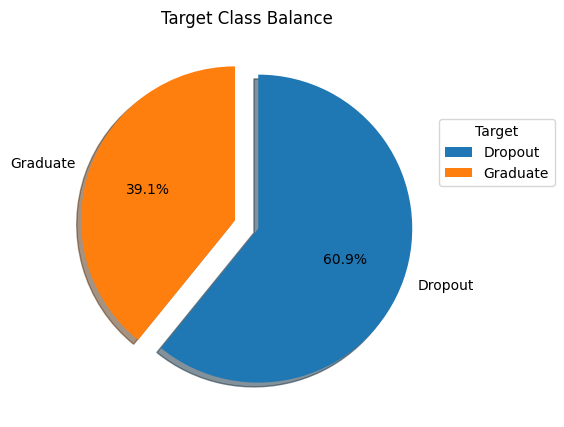

In [ ]:
#타겟 클래스별 분류
target = df_ver0['target'].value_counts()
plt.figure(figsize=(10,6))
labels = ['Dropout','Graduate']
plt.figure(figsize = (10, 5))
plt.title('Target Class Balance')
plt.pie(target, labels=labels, autopct = '%.1f%%', startangle = 90,\
        counterclock = False,explode = [0.08, 0.08],shadow = True)
plt.legend(loc = (1, 0.6), title = 'Target')
plt.show()

## 피처끼리의 상관계수

상관계수가 높은 두 피처는 의미가 같다고 판단, 모델의 복잡도를 낮추기 위해 피처를 제거하는데 사용할 목적으로 시각화 하였다.

In [ ]:
dir = {'Dropout' : 1, 'Graduate' : 0}
df_ver0['target'] = df_ver0.target.map(dir) #Dropout=1,Graduate=0

<Axes: >

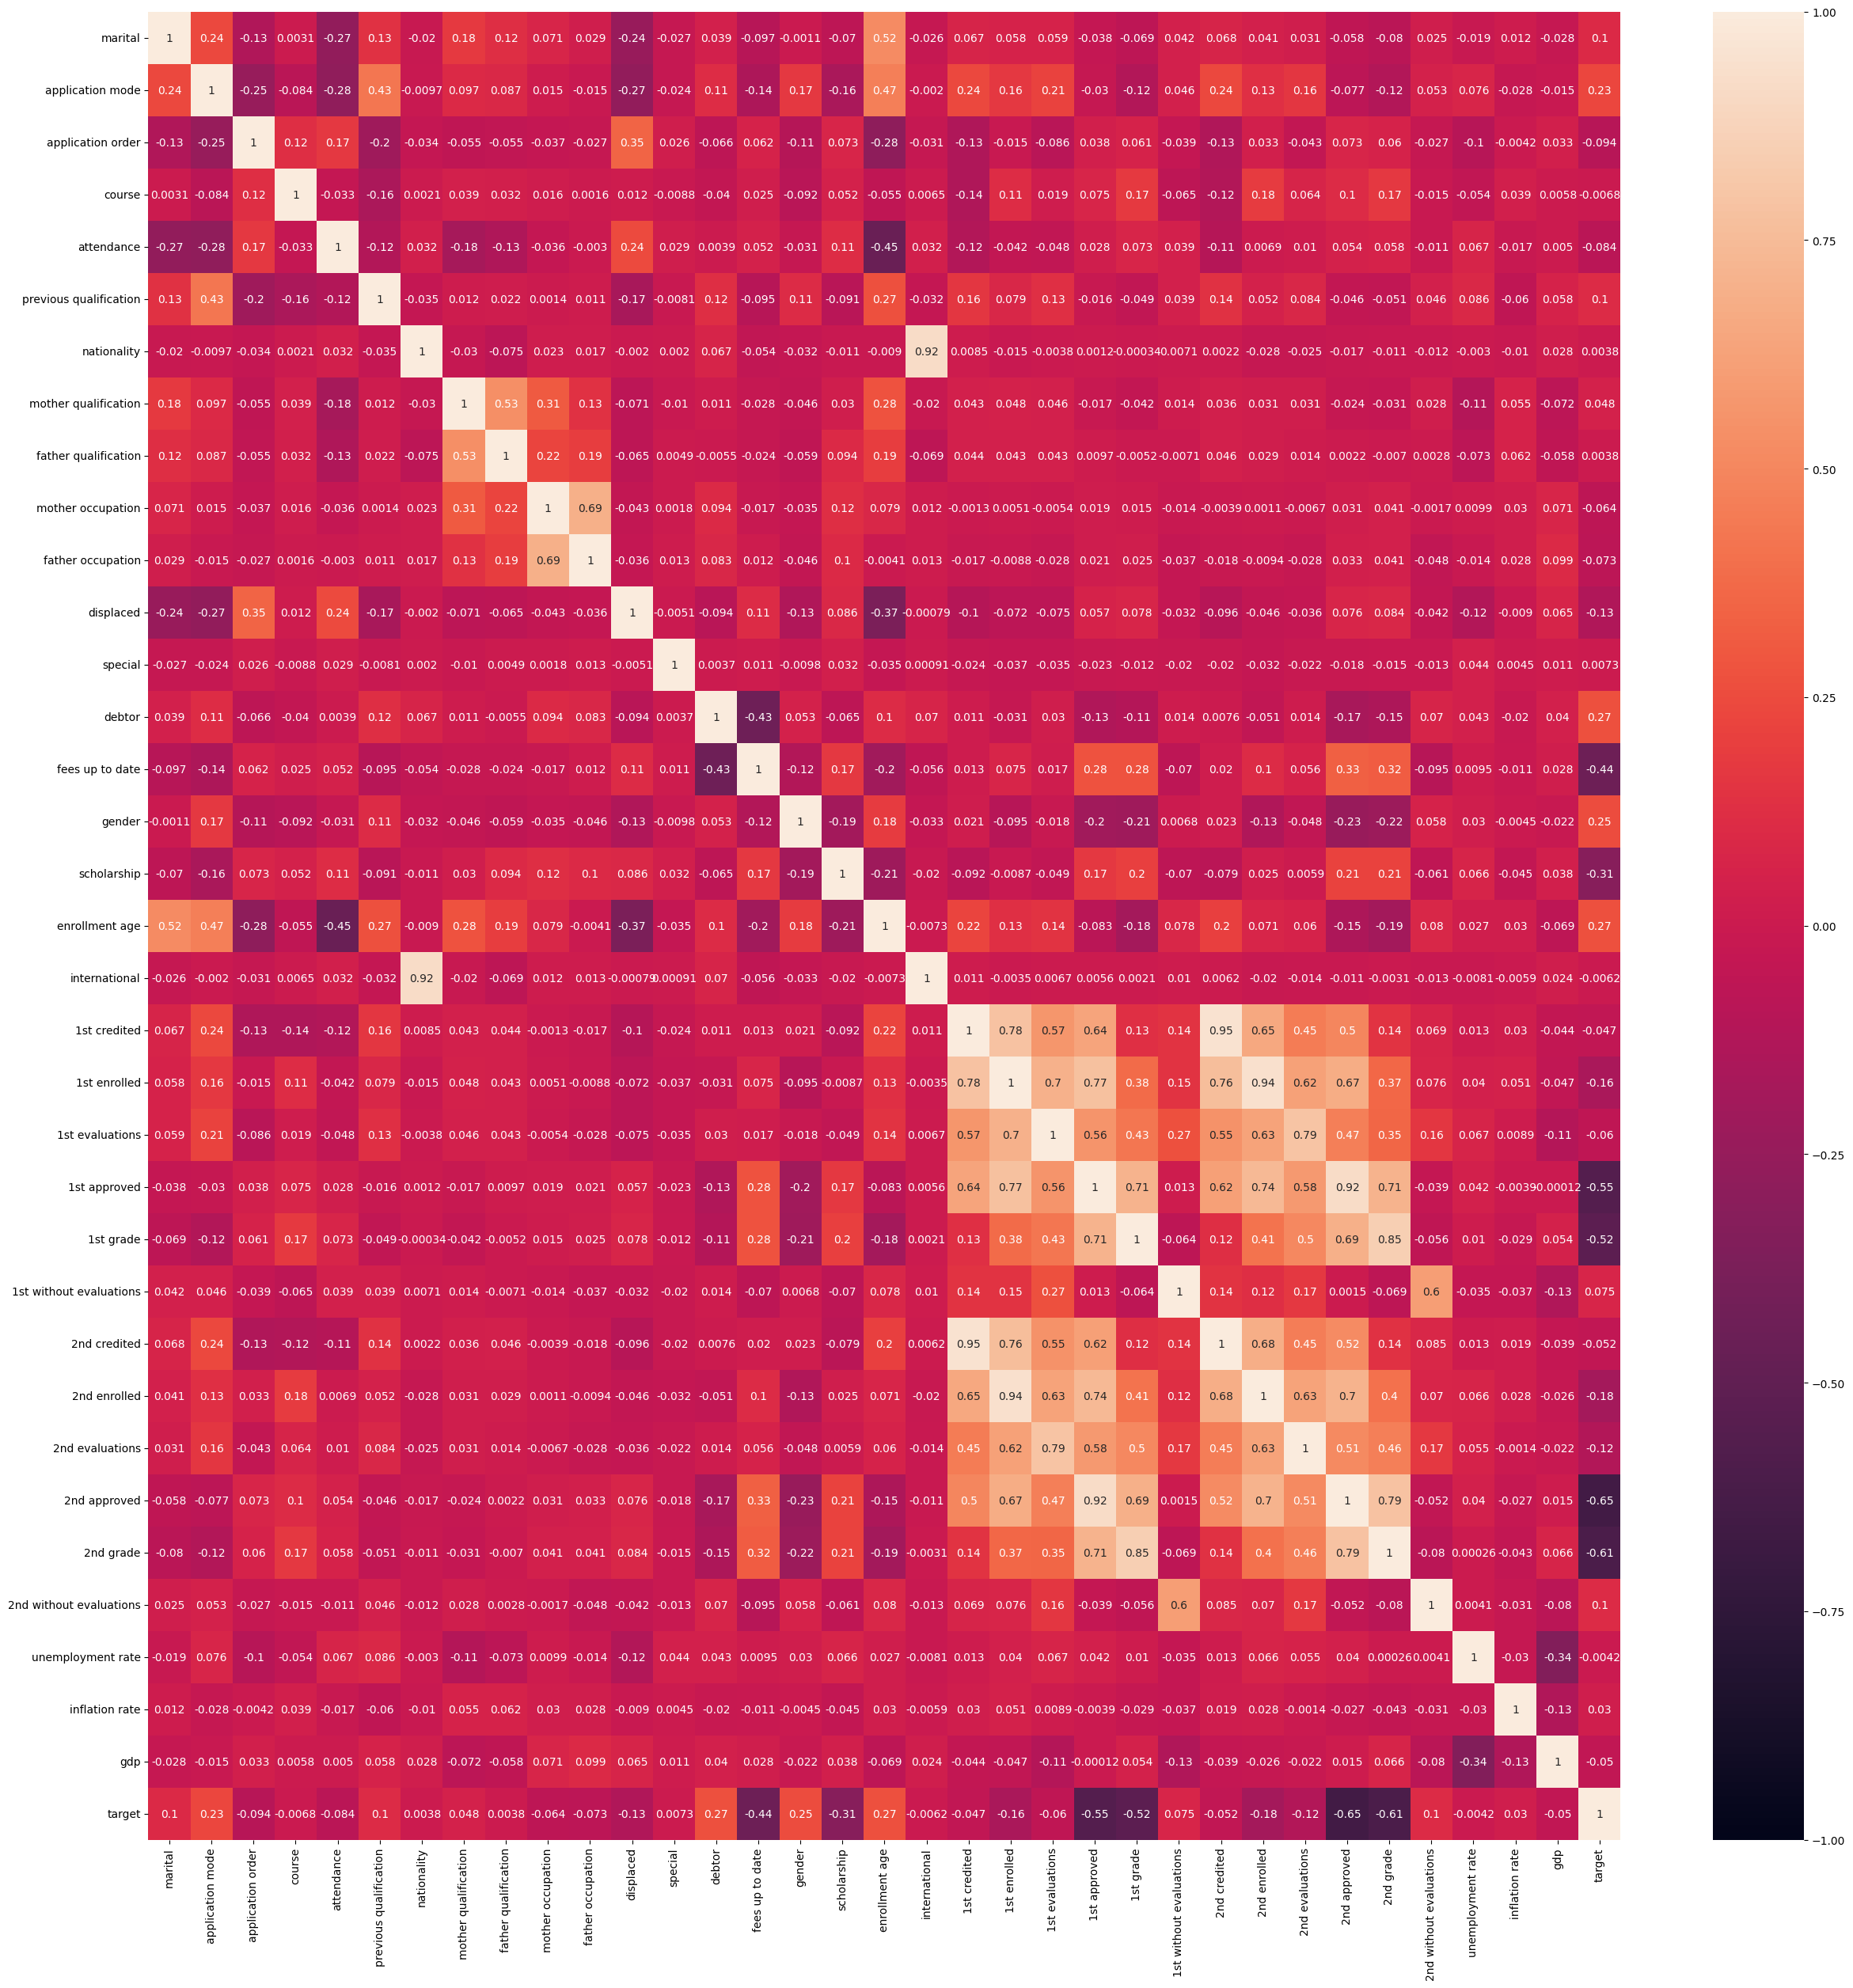

In [ ]:
df_corr = df_ver0.corr()

plt.figure(figsize=(30,30))
sns.heatmap(df_corr, annot=True, vmax=1, vmin=-1)

In [ ]:
corr_list = []
for col in df_corr:
  for row in range(len(df_corr[col])):
    if 0.65 <= df_corr[col][row] < 1.0:
      corr_list.append((df_corr[col][row], col, df_corr.columns[row]))
    if -1.0 < df_corr[col][row] <= -0.65:
      corr_list.append((df_corr[col][row], col, df_corr.columns[row]))

In [ ]:
corr_list.sort()
for i in range(0,len(corr_list),2):
  print(corr_list[i][1] + '  -  ' + corr_list[i][2] + '  -  ' + str(corr_list[i][0])) # 보고서에 추가

2nd approved  -  target  -  -0.6539952460991426
1st credited  -  2nd enrolled  -  0.6507074483823188
1st enrolled  -  2nd approved  -  0.6748797751888375
2nd credited  -  2nd enrolled  -  0.683086144843298
1st grade  -  2nd approved  -  0.6919069581210443
father occupation  -  mother occupation  -  0.6938066740127887
1st enrolled  -  1st evaluations  -  0.6977228049479589
2nd approved  -  2nd enrolled  -  0.7044445310875675
1st approved  -  2nd grade  -  0.7093678199762506
1st approved  -  1st grade  -  0.7101565018864167
1st approved  -  2nd enrolled  -  0.7373747998128278
1st enrolled  -  2nd credited  -  0.7632761218093532
1st approved  -  1st enrolled  -  0.7735791213004372
1st credited  -  1st enrolled  -  0.7828630989223708
2nd approved  -  2nd grade  -  0.7868376275910449
1st evaluations  -  2nd evaluations  -  0.7906158307754103
1st grade  -  2nd grade  -  0.8458637025340845
international  -  nationality  -  0.9153433958119551
1st approved  -  2nd approved  -  0.916333978491401

## 종합적인 데이터 분포

전처리에 참고할 수 있는 피처별 데이터 분포를 확인한다.

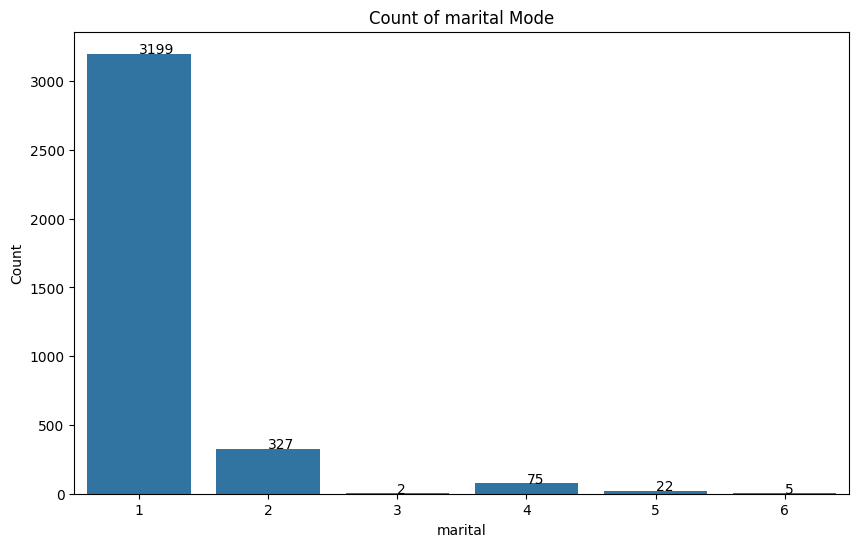

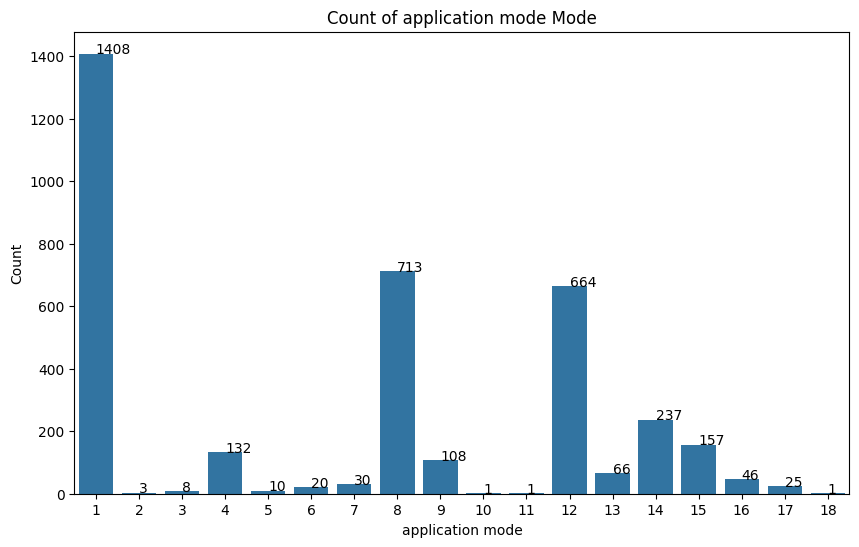

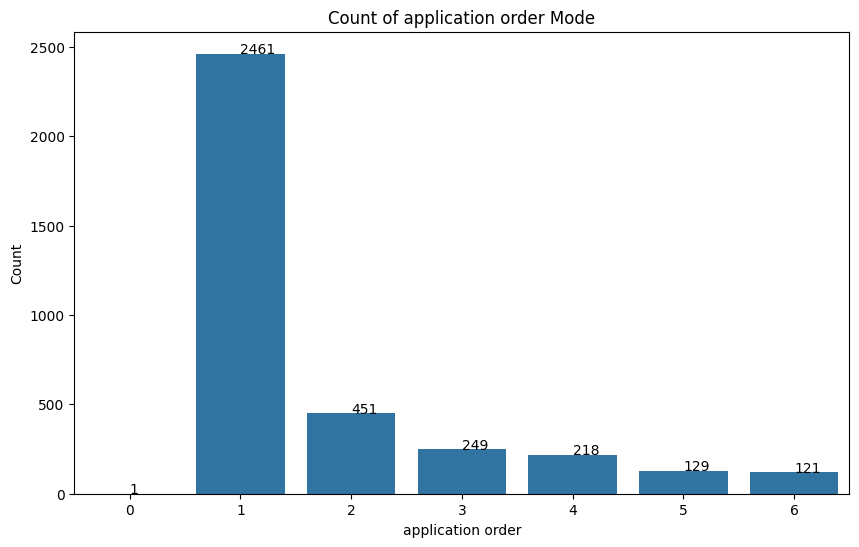

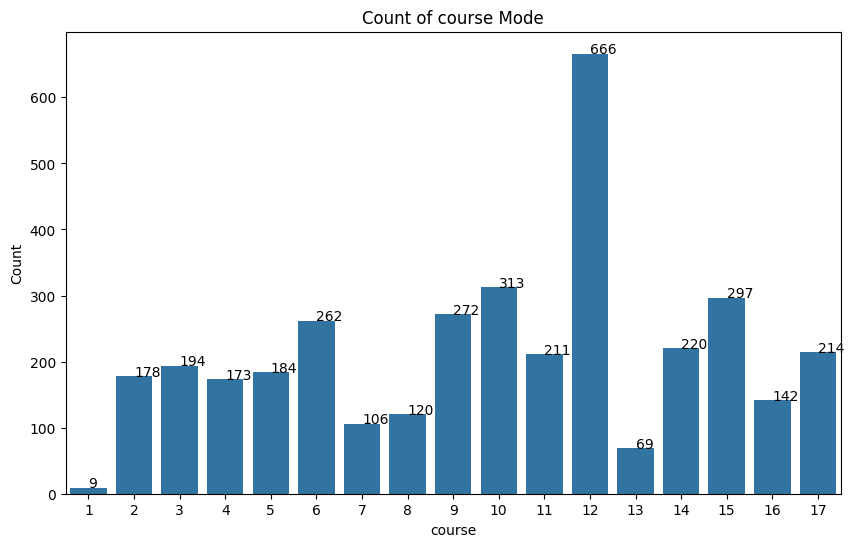

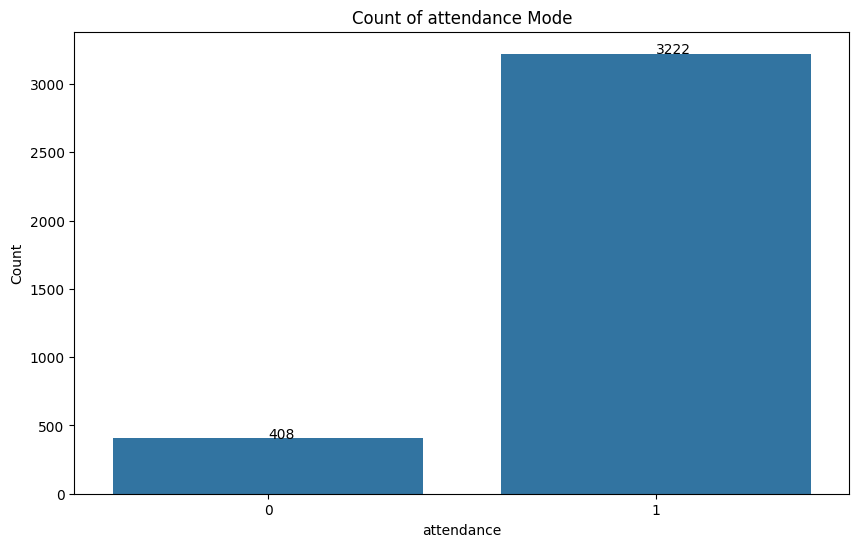

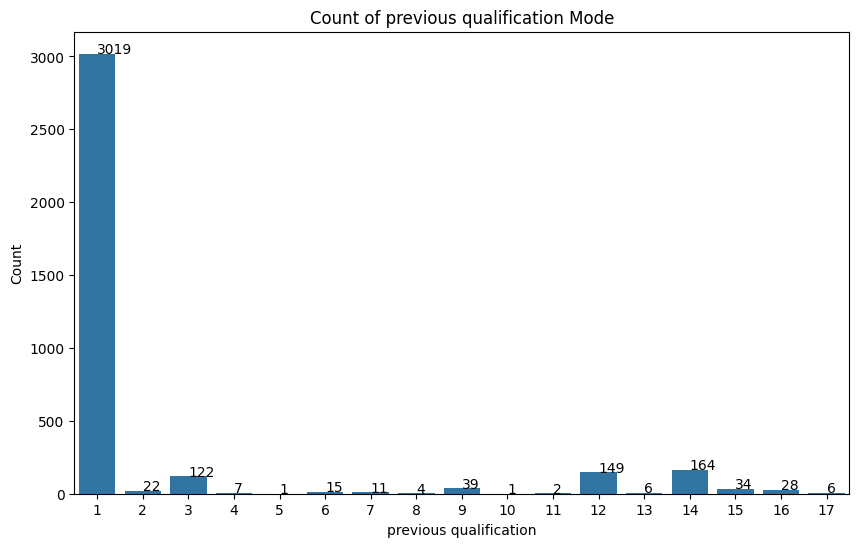

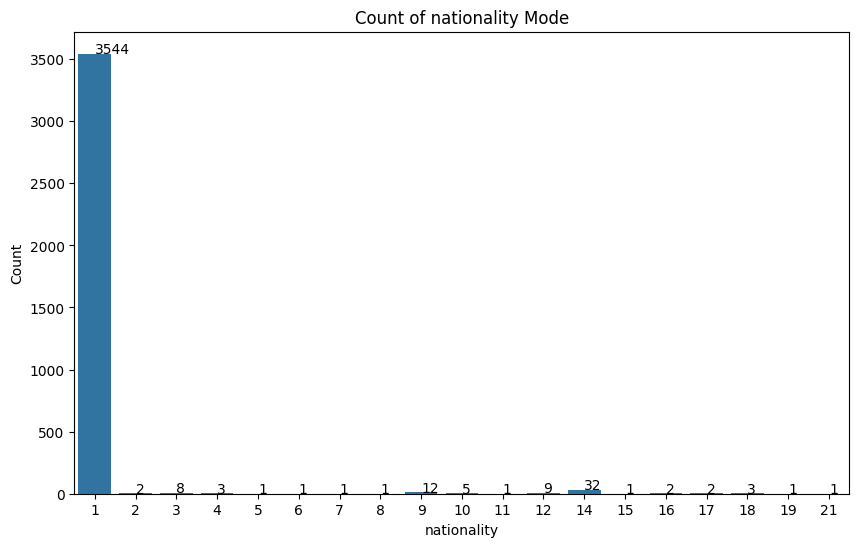

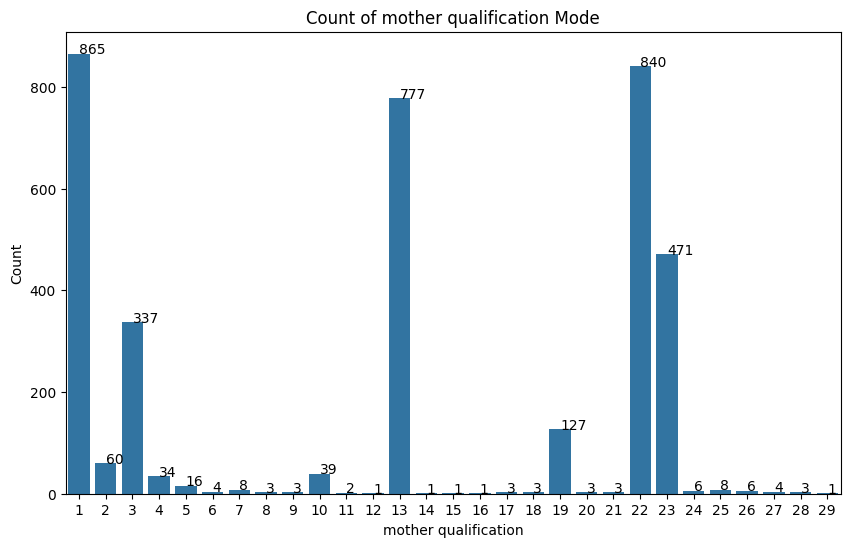

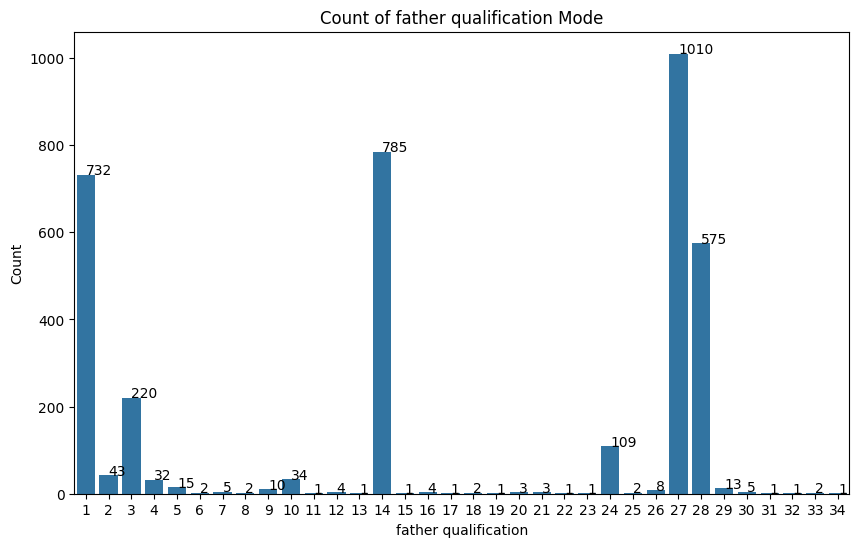

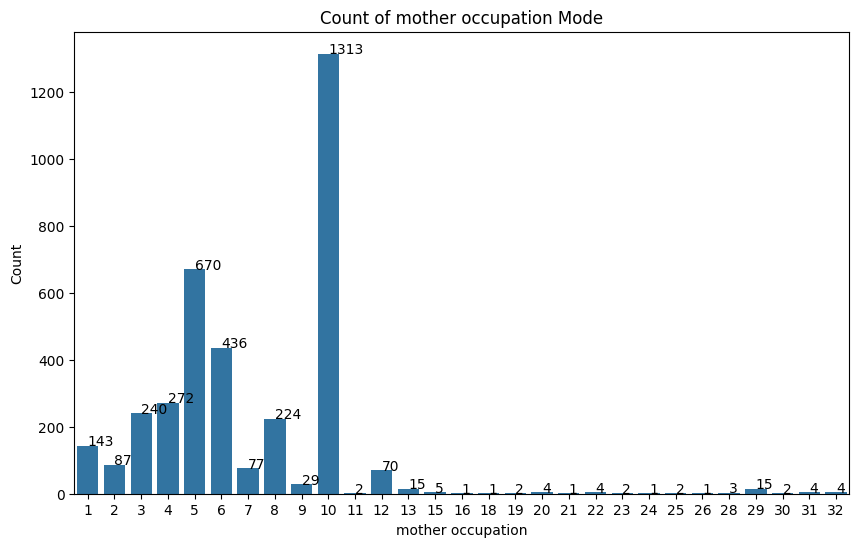

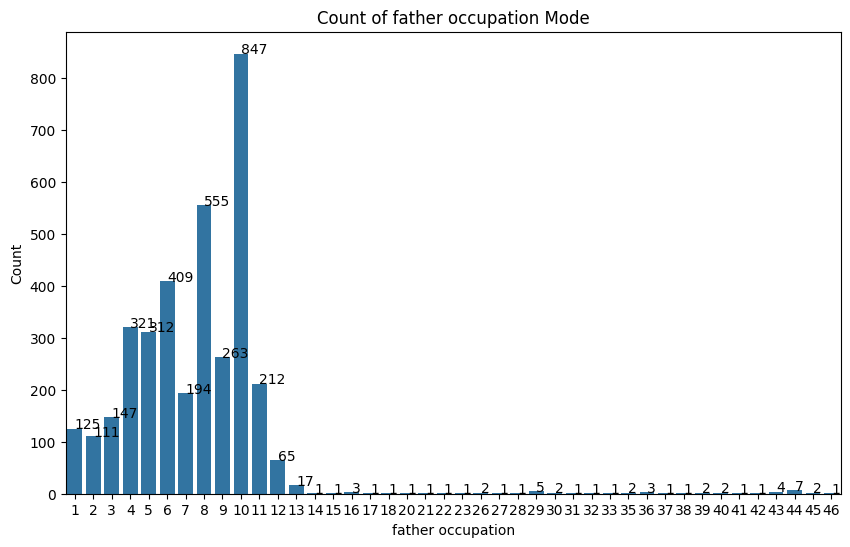

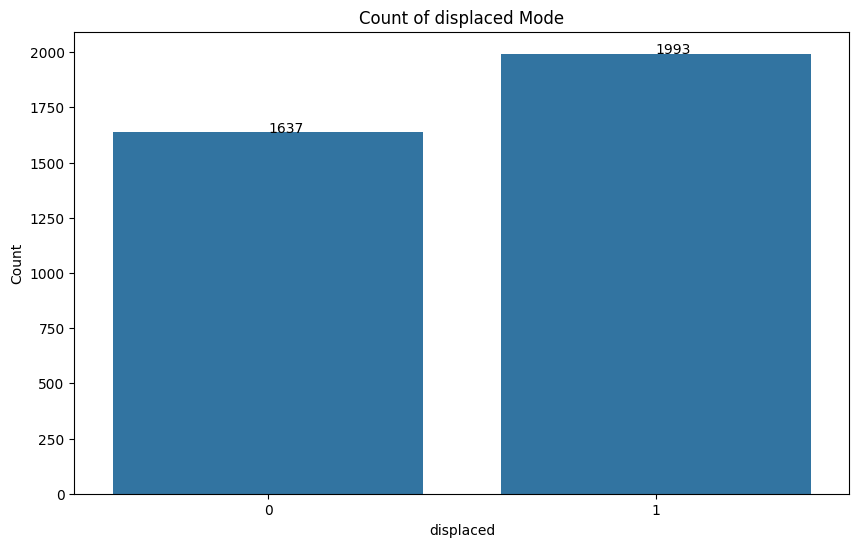

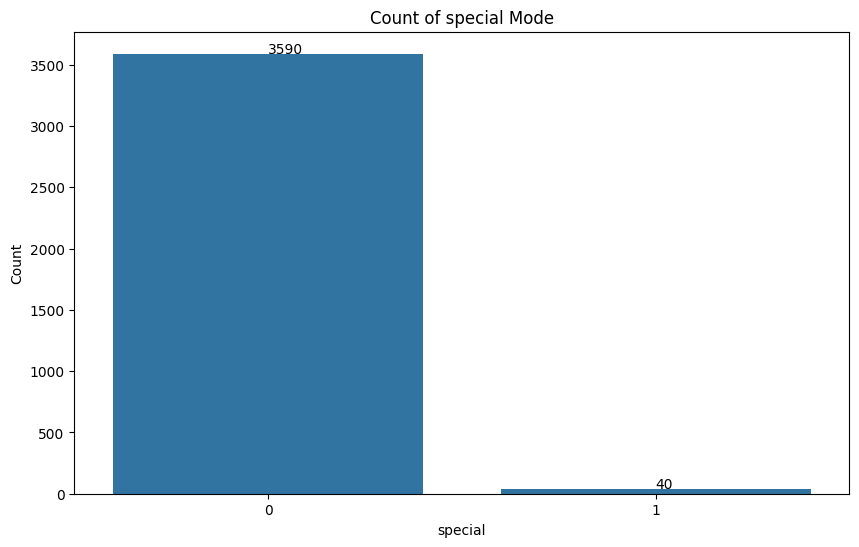

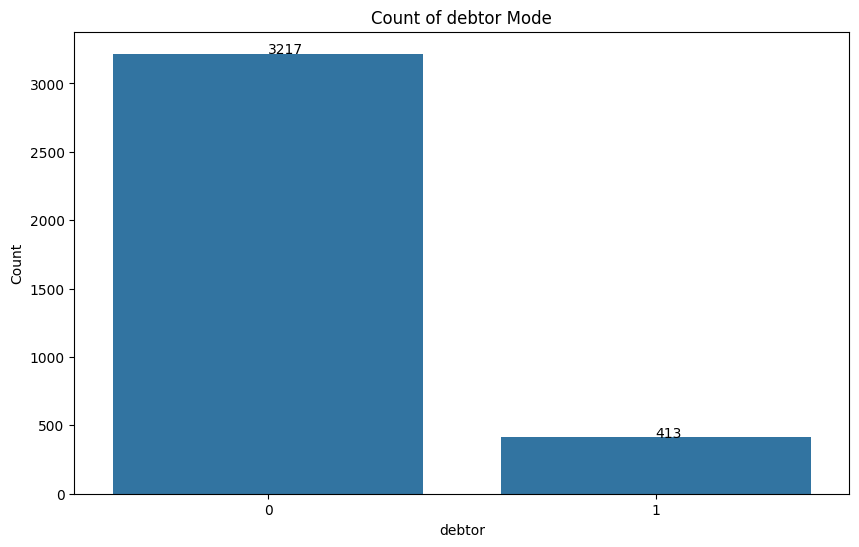

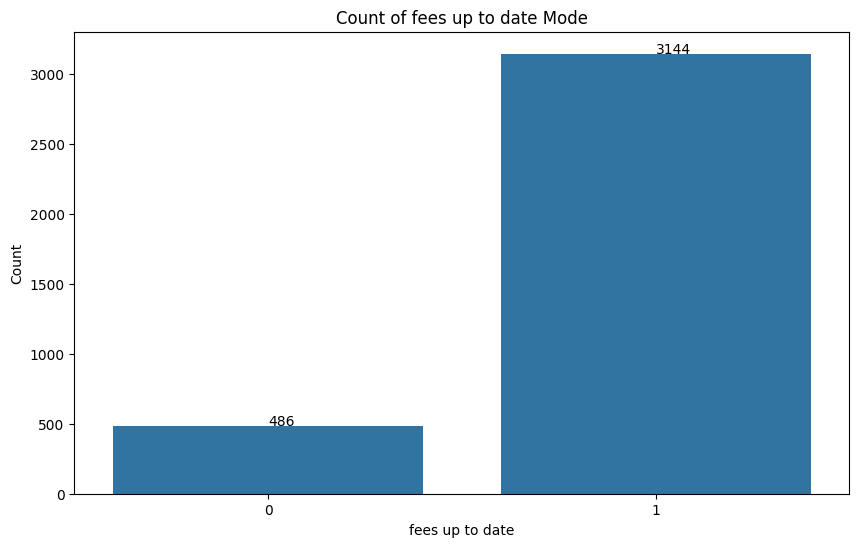

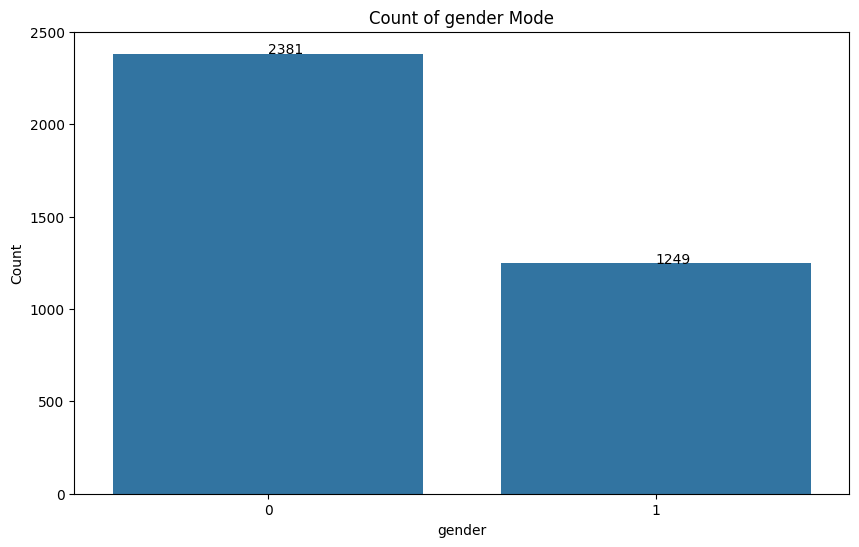

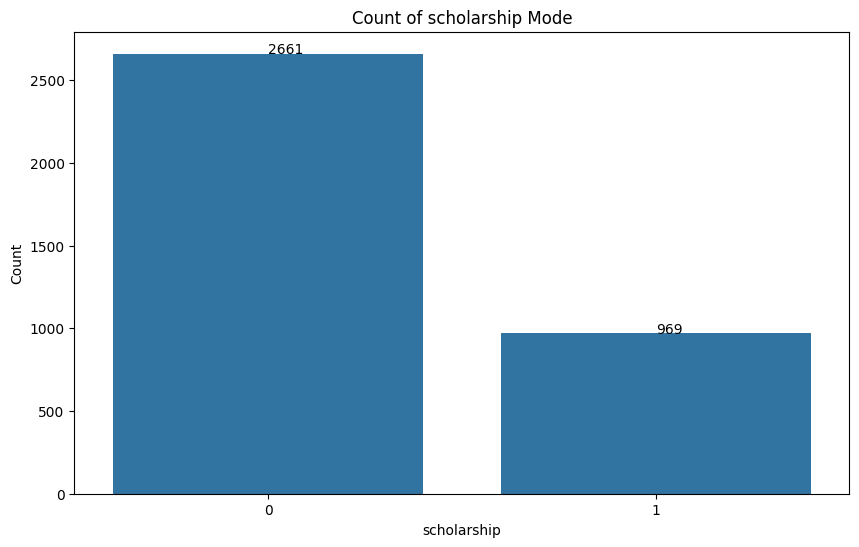

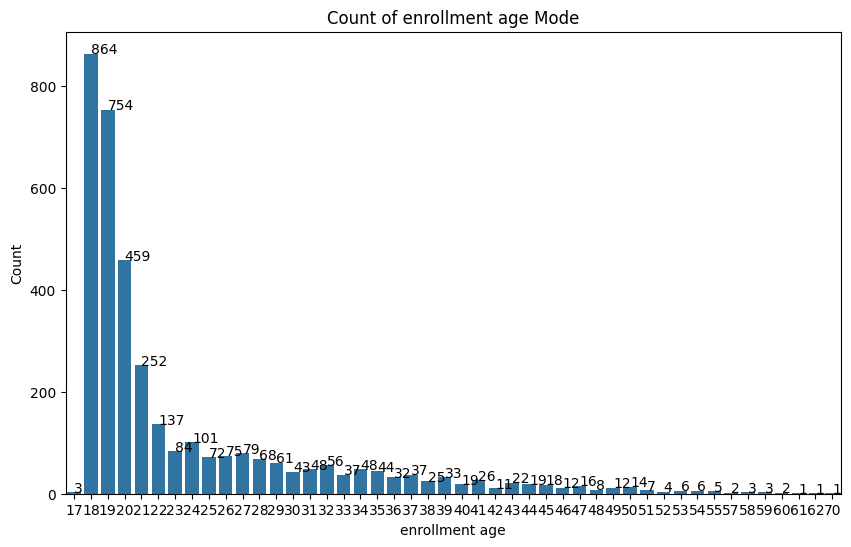

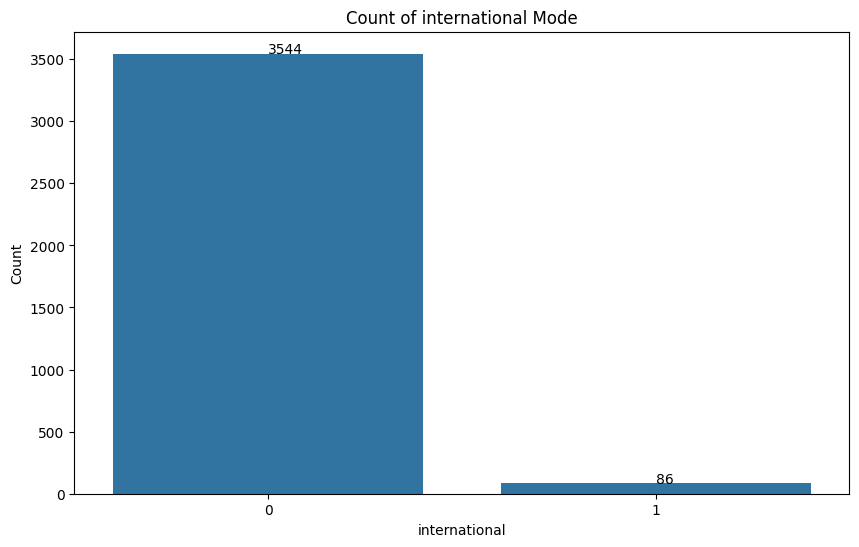

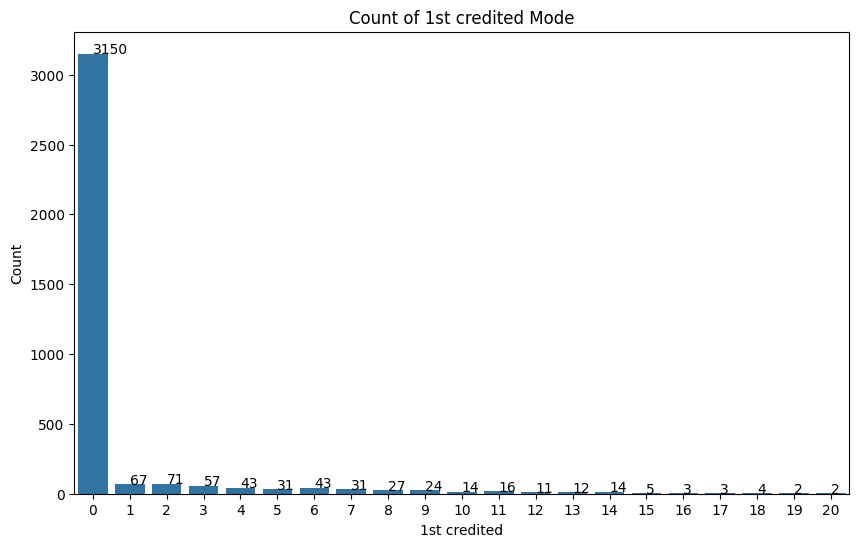

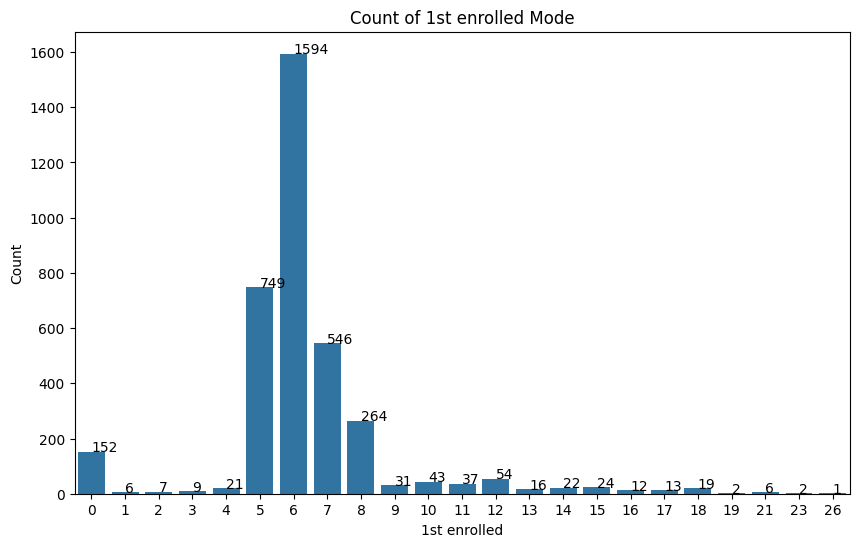

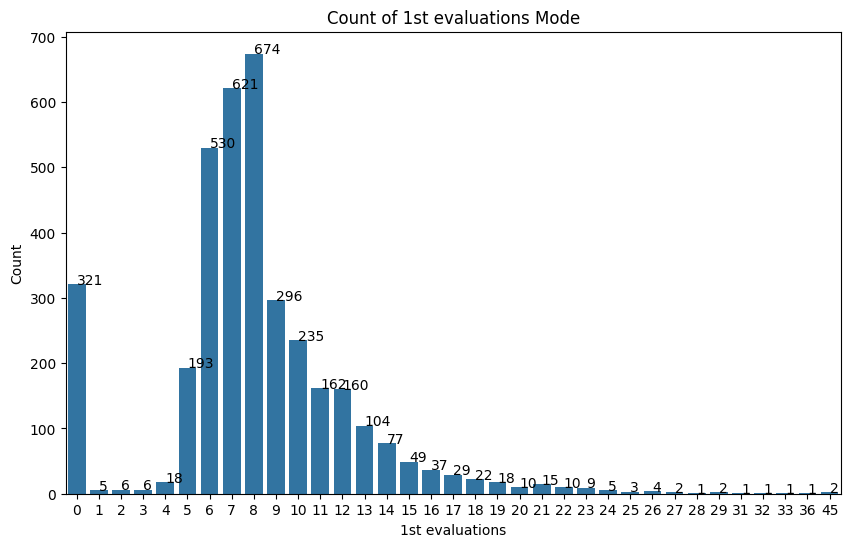

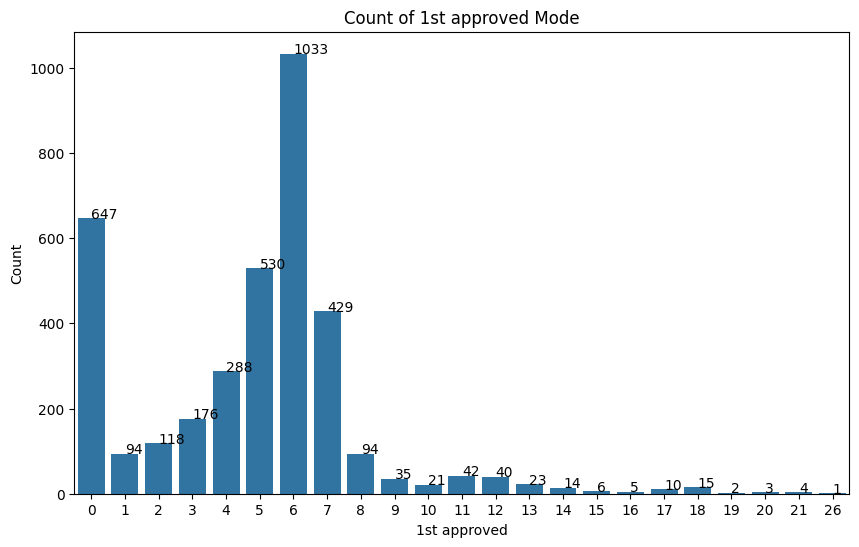

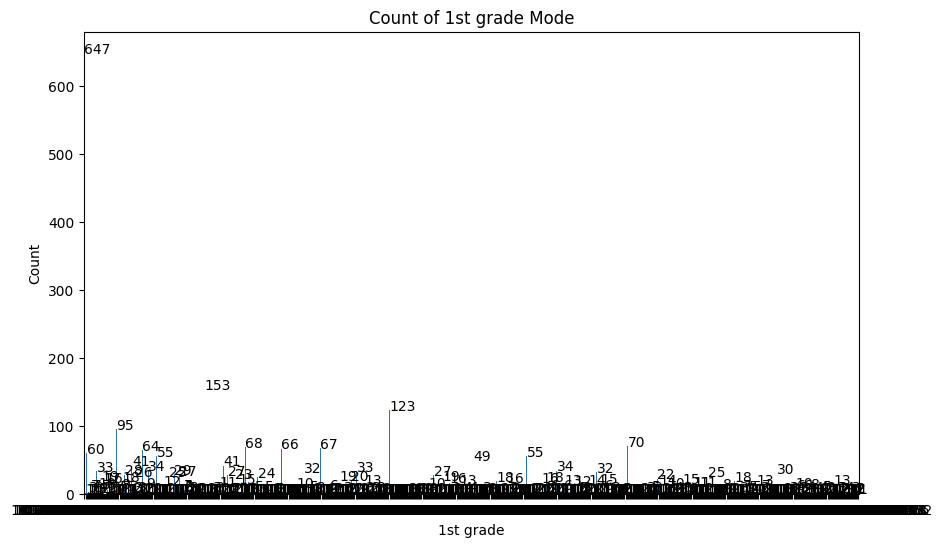

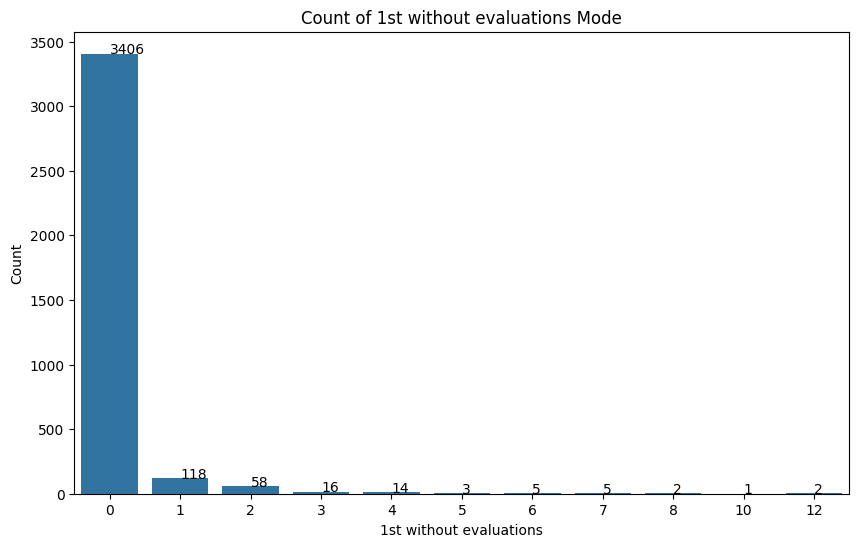

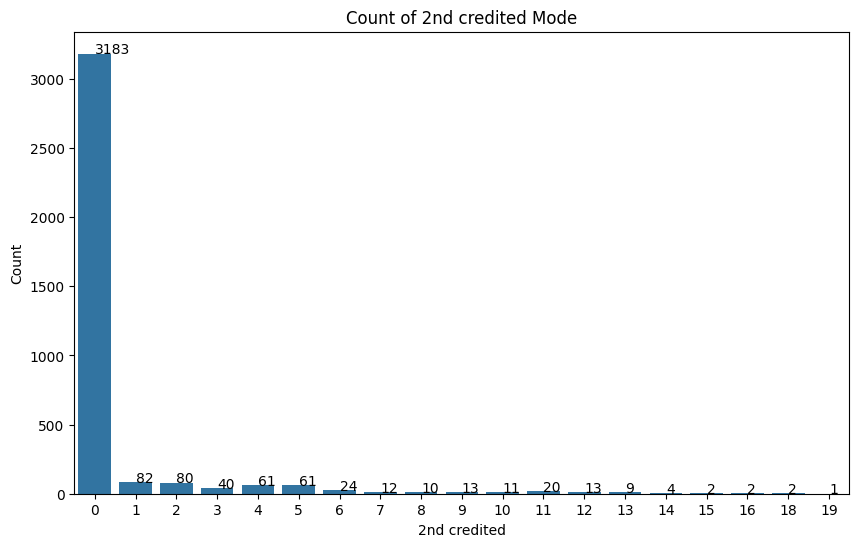

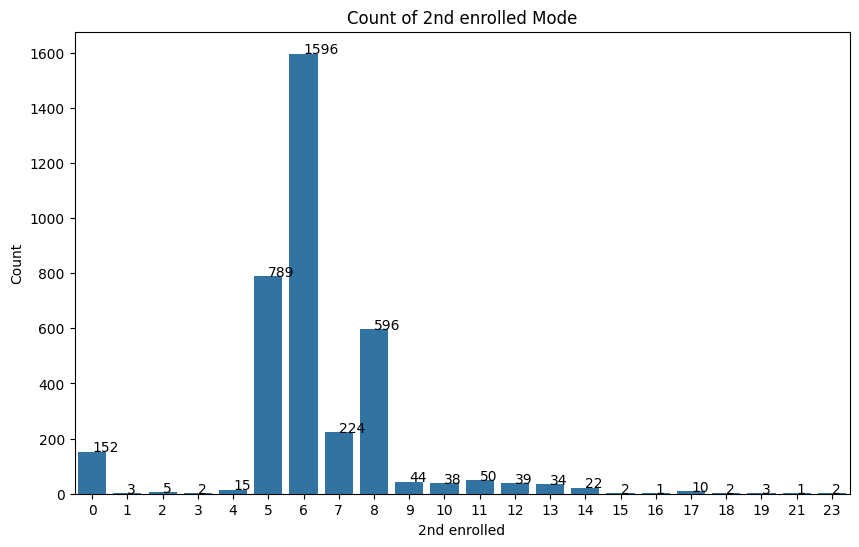

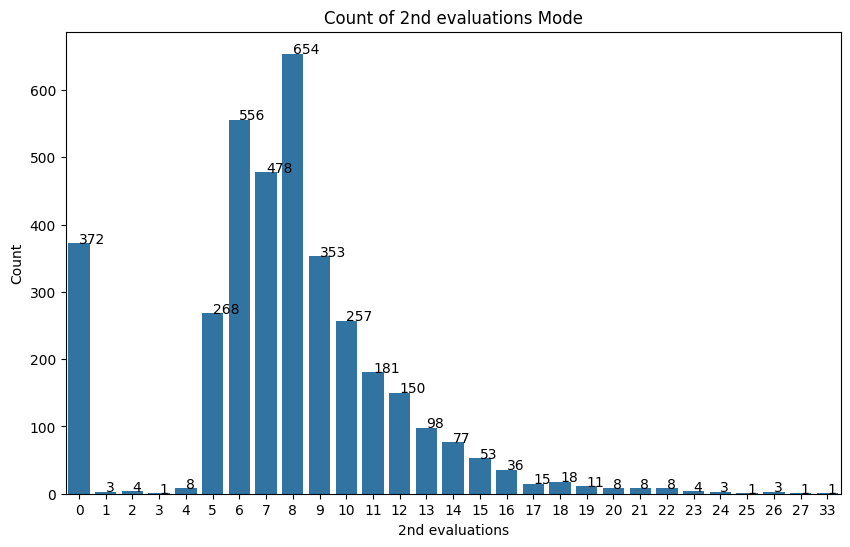

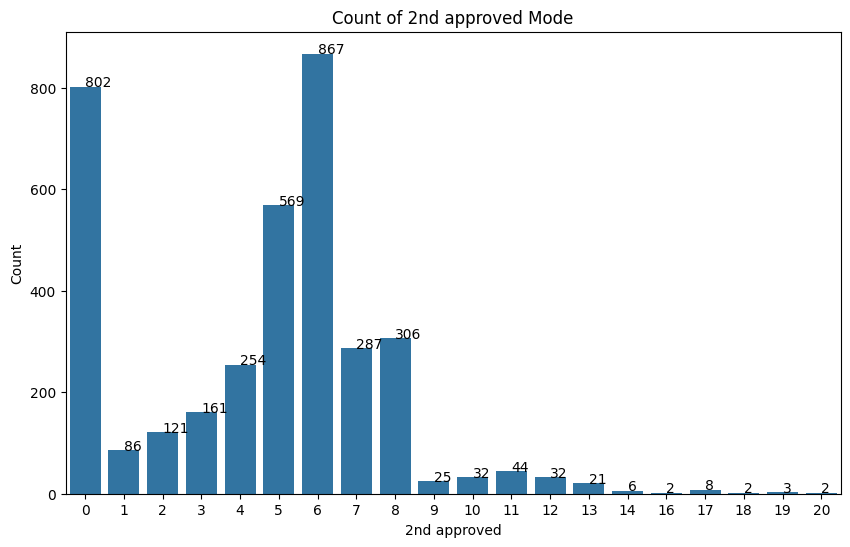

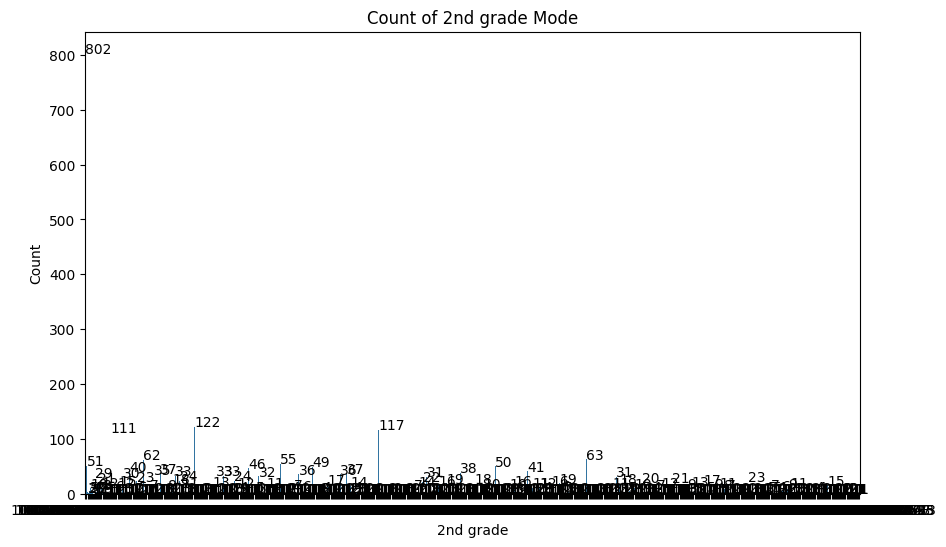

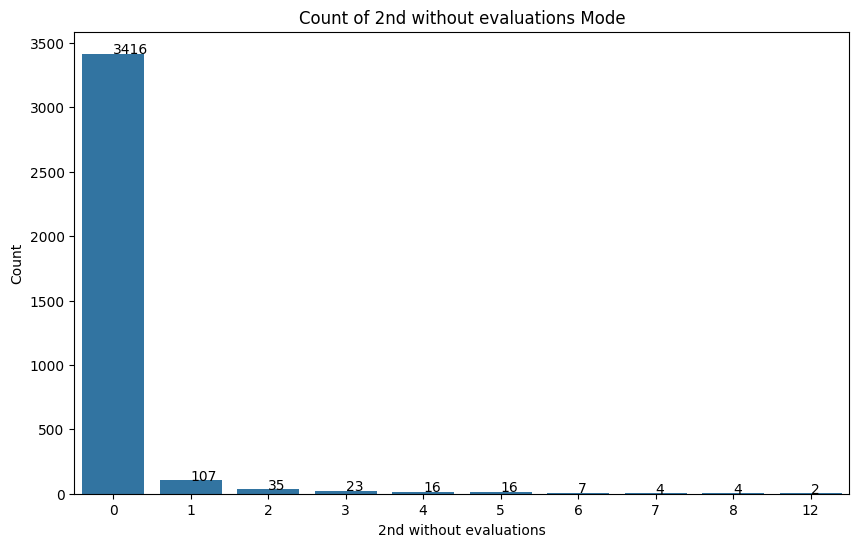

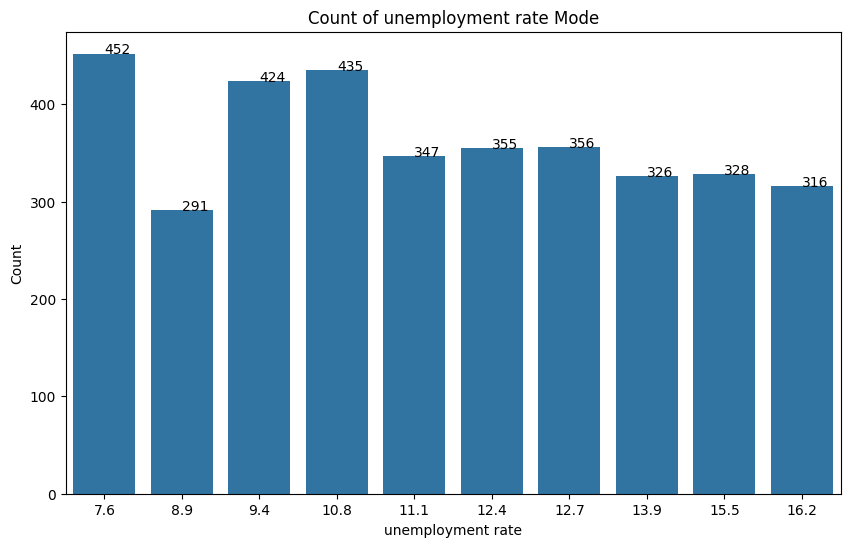

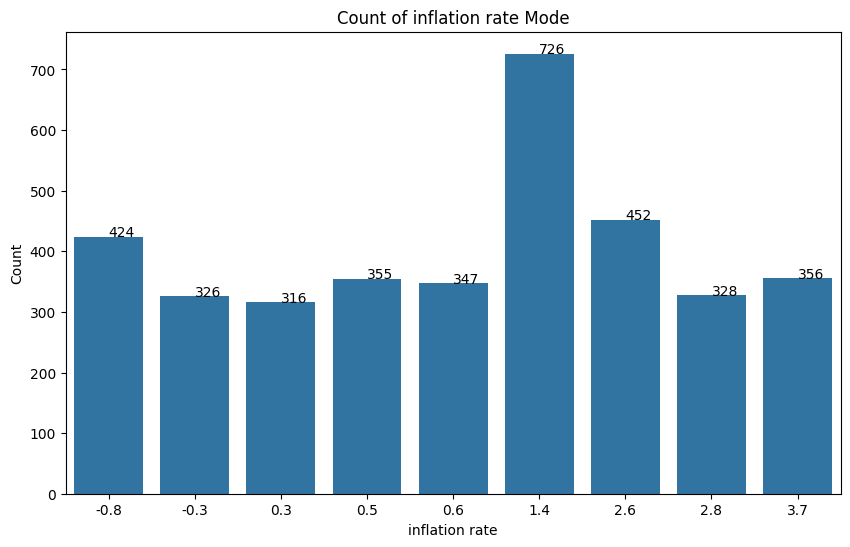

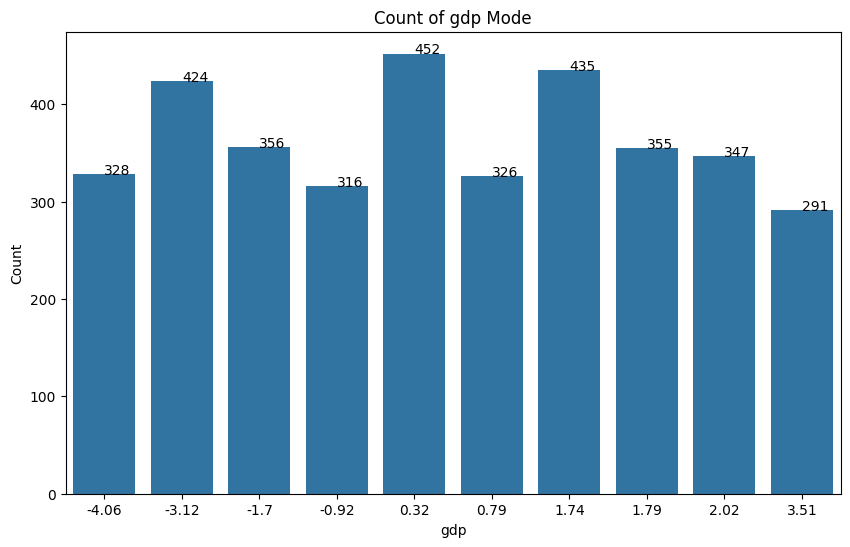

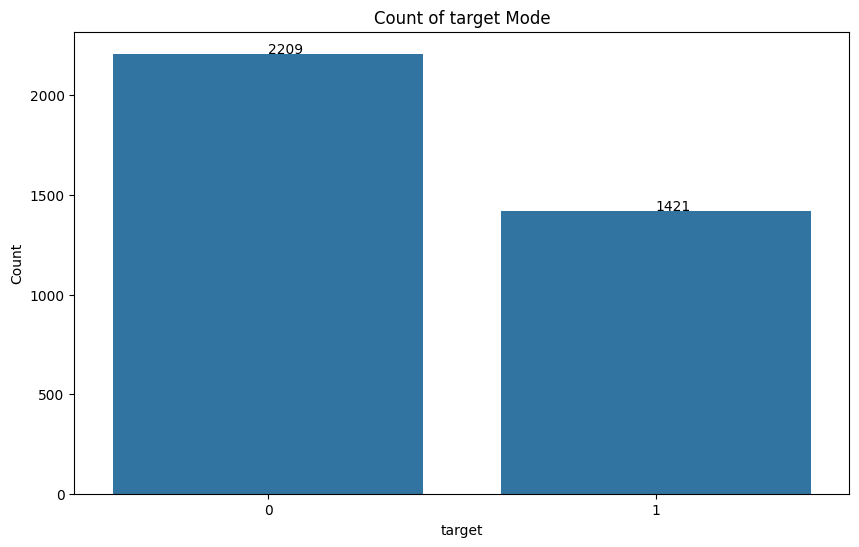

In [ ]:
for i in df.columns:
    value_counts = df_ver0[i].value_counts().sort_index()

    plt.figure(figsize=(10,6))
    ax = sns.barplot(x=value_counts.index, y=value_counts.values)

    for index, value in enumerate(value_counts):
        ax.text(index, value, str(value))

    plt.title('Count of {} Mode'.format(i))
    plt.xlabel(i)
    plt.ylabel('Count')
    plt.show()

## 유학생 신분인지에 따른 학업 포기 여부

<Axes: xlabel='international', ylabel='count'>

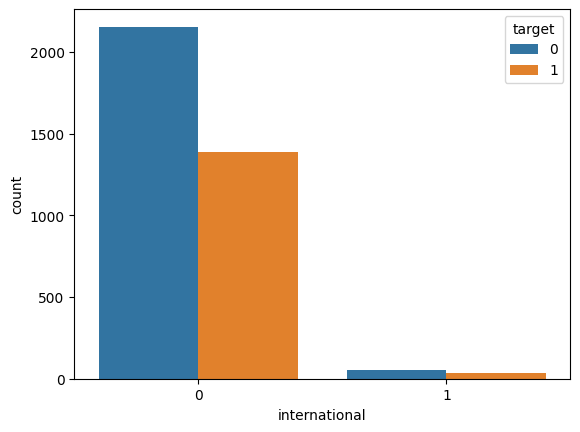

In [ ]:
sns.countplot(data=df_ver0, x='international', hue='target')

## 장학금 여부에 따른 학업포기여부

<Axes: xlabel='scholarship', ylabel='count'>

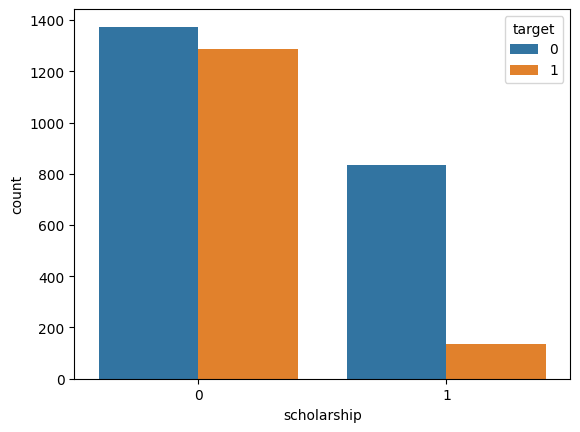

In [ ]:
sns.countplot(data=df_ver0, x='scholarship', hue='target')

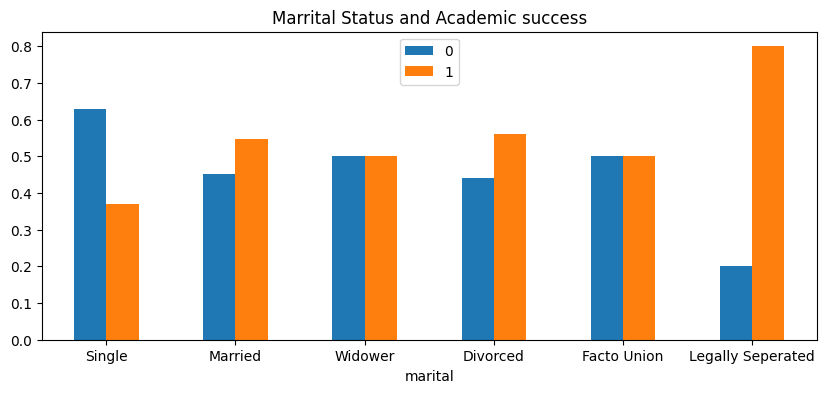

In [ ]:
pd.crosstab(df_ver0["marital"], df_ver0["target"], normalize='index').plot(kind="bar", figsize=(10,4), title="Marrital Status and Academic success" )
plt.xticks([0, 1, 2, 3, 4, 5], ['Single', 'Married', 'Widower', 'Divorced', 'Facto Union', 'Legally Seperated'], rotation=0)
plt.legend(loc=9)
plt.show()

## 성별에 따른 학업포기여부

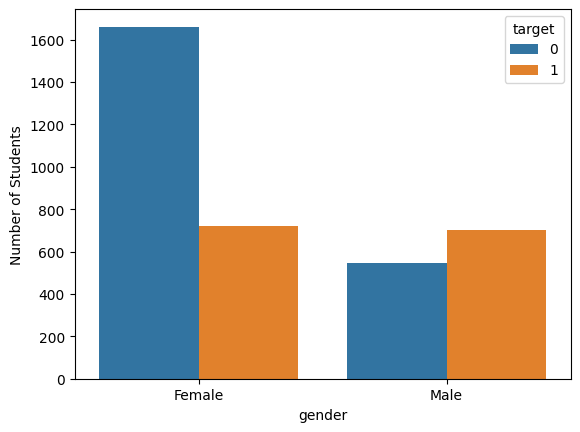

In [ ]:
sns.countplot(data=df_ver0, x='gender', hue='target')

plt.xticks(ticks=[0,1], labels=['Female','Male'])
plt.ylabel('Number of Students')
plt.show()

## 전공과정별 학업포기여부

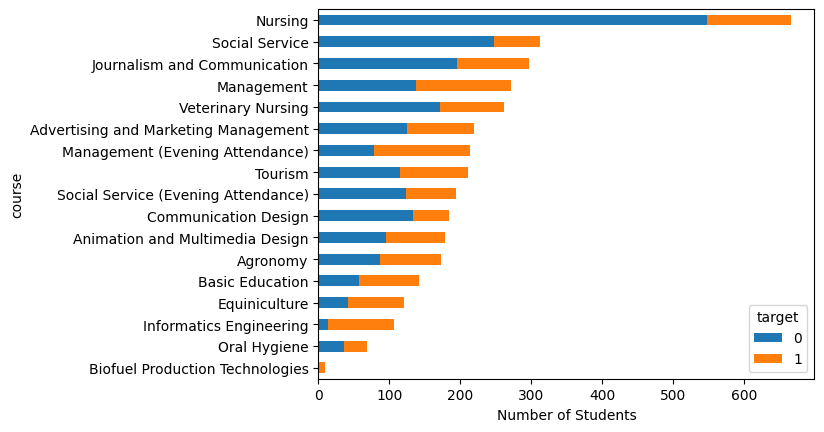

In [ ]:
student_course = df_ver0.groupby(['course', 'target']).size().reset_index().pivot(columns='target', index='course', values=0)

student_course = student_course.rename(index={1:'Biofuel Production Technologies',2:'Animation and Multimedia Design',3:'Social Service (Evening Attendance)',
                                              4:'Agronomy',5:'Communication Design',6:'Veterinary Nursing',7:'Informatics Engineering',8:'Equiniculture',
                                              9:'Management',10:'Social Service',11:'Tourism',12:'Nursing',13:'Oral Hygiene',14:'Advertising and Marketing Management',
                                              15:'Journalism and Communication',16:'Basic Education',17:'Management (Evening Attendance)'})

student_course_total = student_course.sum(axis=1)
student_course_sorted = student_course_total.sort_values(ascending=True)
student_course.loc[student_course_sorted.index].plot(kind='barh', stacked=True)

plt.xlabel('Number of Students')
plt.show()

## Outlier

In [ ]:
df_ver_outlier = df_ver0.copy()
df_ver_outlier.reset_index(drop=True, inplace=True)

In [ ]:
df_outlier = df_ver_outlier.copy()

In [ ]:
df_outlier = df_outlier.drop(['marital', 'application mode', 'application order', 'course',
       'attendance', 'previous qualification', 'nationality',
       'mother qualification', 'father qualification', 'mother occupation',
       'father occupation', 'displaced', 'special', 'debtor',
       'fees up to date', 'gender', 'scholarship',
       'international', 'target'], axis=1)

In [ ]:
df_outlier.columns

Index(['enrollment age', '1st credited', '1st enrolled', '1st evaluations',
       '1st approved', '1st grade', '1st without evaluations', '2nd credited',
       '2nd enrolled', '2nd evaluations', '2nd approved', '2nd grade',
       '2nd without evaluations', 'unemployment rate', 'inflation rate',
       'gdp'],
      dtype='object')

### Train 데이터를 증강하여 K-Fold 평균 성능 지표 측정

In [ ]:
kf = StratifiedKFold(n_splits=5)

In [ ]:
def get_over_kfold_metrics(model, X, y):
  a_rfc=[] # accuracy
  f_rfc=[] # f-score
  a_tr=[] # accuracy
  f_tr=[] # f-score

  x_arr = np.asarray(X)
  y_arr = np.asarray(y)
  for train_index, valid_index in kf.split(x_arr, y_arr):

      x_train, x_valid = x_arr[train_index], x_arr[valid_index]
      y_train, y_valid = y_arr[train_index], y_arr[valid_index]
      x_valid = pd.DataFrame(x_valid)
      # array concat
      print('데이터 증강 전 타겟 1: ' + str(len(y_train[y_train == 1])))
      print('데이터 증강 전 타겟 0: ' + str(len(y_train[y_train == 0])))

      smote = SMOTE(random_state=42)

      #print(len(y_train))
      #X_train_over, y_train_over = smote.fit_resample(x_train, pd.DataFrame(y_train))
      #print(len(y_train_over))
      X_train_over, y_train_over = smote.fit_resample(x_train, y_train)
      #print(y_train_over.sample(5))
      #print(y_train_over.info())
      print('데이터 증강 후 타겟 1: ' + str(len(y_train_over[y_train_over == 1])))
      print('데이터 증강 후 타겟 0: ' + str(len(y_train_over[y_train_over == 0])))



      #clf
      model.fit(X_train_over, y_train_over)
      pred_tr = model.predict(X_train_over)
      pred_rfc = model.predict(x_valid)

      #score
      accuracy_tr = accuracy_score(y_train_over,pred_tr)
      accuracy_rfc = accuracy_score(y_valid,pred_rfc)
      a_rfc.append(accuracy_rfc)
      a_tr.append(accuracy_tr)

      f1_tr = f1_score(y_train_over,pred_tr)
      f1_rfc = f1_score(y_valid,pred_rfc)
      f_rfc.append(f1_rfc)
      f_tr.append(f1_tr)

      return round(np.mean(a_tr), 3), round(np.mean(f_tr), 3), round(np.mean(a_rfc), 3), round(np.mean(f_rfc), 3)

In [ ]:
# 이상치와 비교를 위한 기본 성능 확인
logi = LogisticRegression(solver = 'liblinear', random_state=42)
X = df_ver0.drop('target', axis=1)
y = df_ver0['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

get_over_kfold_metrics(logi, X_train, y_train)

데이터 증강 전 타겟 1: 915
데이터 증강 전 타겟 0: 1408
데이터 증강 후 타겟 1: 1408
데이터 증강 후 타겟 0: 1408


(0.907, 0.904, 0.919, 0.895)

### Z-Score

In [ ]:
z = np.abs(stats.zscore(df_outlier))
threshold = 3
df_detect_z = np.where(z > threshold)[0]
df_detect_z = set(df_detect_z)
df_detect_z = list(df_detect_z)
print(len(df_detect_z))

311


In [ ]:
df_delete_outlier_z = df_ver_outlier.drop(df_detect_z, axis=0)

In [ ]:
logi = LogisticRegression(solver = 'liblinear', random_state=42)
X = df_delete_outlier_z.drop('target', axis=1)
y = df_delete_outlier_z['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
get_over_kfold_metrics(logi, X_train, y_train)

데이터 증강 전 타겟 1: 805
데이터 증강 전 타겟 0: 1319
데이터 증강 후 타겟 1: 1319
데이터 증강 후 타겟 0: 1319


(0.905, 0.902, 0.923, 0.899)

### Isolation Forest

In [ ]:
ilf = IsolationForest(random_state=42)
ilf_pred = ilf.fit_predict(df_outlier)
df_detect_ilf = np.where(ilf_pred == -1)[0]

print(len(df_detect_ilf))

609


In [ ]:
df_delete_outlier_ilf = df_ver_outlier.drop(df_detect_ilf, axis=0)

In [ ]:
logi = LogisticRegression(solver = 'liblinear', random_state=42)
X = df_delete_outlier_ilf.drop('target', axis=1)
y = df_delete_outlier_ilf['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
get_over_kfold_metrics(logi, X_train, y_train)

데이터 증강 전 타겟 1: 693
데이터 증강 전 타겟 0: 1239
데이터 증강 후 타겟 1: 1239
데이터 증강 후 타겟 0: 1239


(0.912, 0.909, 0.928, 0.897)

### LOF

In [ ]:
lof = LocalOutlierFactor()
lof_pred = lof.fit_predict(df_outlier)
df_detect_lof = np.where(lof_pred == -1)[0]

print(len(df_detect_lof))

154


In [ ]:
df_delete_outlier_lof = df_ver_outlier.drop(df_detect_lof, axis=0)

In [ ]:
logi = LogisticRegression(solver = 'liblinear', random_state=42)
X = df_delete_outlier_lof.drop('target', axis=1)
y = df_delete_outlier_lof['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
get_over_kfold_metrics(logi, X_train, y_train)

데이터 증강 전 타겟 1: 892
데이터 증강 전 타겟 0: 1332
데이터 증강 후 타겟 1: 1332
데이터 증강 후 타겟 0: 1332


(0.918, 0.916, 0.885, 0.857)

### DBSCAN

In [ ]:
dbscan = DBSCAN(eps=2, min_samples=3)
clusters = dbscan.fit_predict(df_outlier)
df_detect_dbscan = np.where(clusters == -1)[0]

len(df_detect_dbscan)

1910

In [ ]:
df_delete_outlier_dbscan = df_ver_outlier.drop(df_detect_dbscan, axis=0)

In [ ]:
logi = LogisticRegression(solver = 'liblinear', random_state=42)
X = df_delete_outlier_dbscan.drop('target', axis=1)
y = df_delete_outlier_dbscan['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
get_over_kfold_metrics(logi, X_train, y_train)

데이터 증강 전 타겟 1: 240
데이터 증강 전 타겟 0: 860
데이터 증강 후 타겟 1: 860
데이터 증강 후 타겟 0: 860


(0.884, 0.88, 0.902, 0.806)

### IQR

In [ ]:
 for i in df_outlier.columns:
    Q1 = df_outlier[i].quantile(0.25)
    Q3 = df_outlier[i].quantile(0.75)
    IQR = Q3 - Q1
    min = Q1 - 1.5 * IQR
    max = Q3 + 1.5 * IQR
    outliers = (df_outlier[i] < min) | (df_outlier[i] > max)
    false_values = outliers[outliers == True].sum()
    print('{} outlier: {}'.format(i, false_values))

enrollment age outlier: 389
1st credited outlier: 480
1st enrolled outlier: 366
1st evaluations outlier: 136
1st approved outlier: 165
1st grade outlier: 652
1st without evaluations outlier: 224
2nd credited outlier: 447
2nd enrolled outlier: 321
2nd evaluations outlier: 81
2nd approved outlier: 44
2nd grade outlier: 803
2nd without evaluations outlier: 214
unemployment rate outlier: 0
inflation rate outlier: 0
gdp outlier: 0


In [ ]:
df_detect_IQR = set()

for i in df_outlier.columns:
    Q1 = df_outlier[i].quantile(0.25)
    Q3 = df_outlier[i].quantile(0.75)
    IQR = Q3 - Q1
    min = Q1 - 1.5 * IQR
    max = Q3 + 1.5 * IQR
    outliers = (df_outlier[i] < min) | (df_outlier[i] > max)
    detect = np.where(outliers == True)[0]
    df_detect_IQR.update(detect)

print(len(df_detect_IQR))

1617


In [ ]:
df_delete_outlier_IQR = df_ver_outlier.drop(df_detect_IQR, axis=0)

In [ ]:
logi = LogisticRegression(solver = 'liblinear', random_state=42)
X = df_delete_outlier_IQR.drop('target', axis=1)
y = df_delete_outlier_IQR['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
get_over_kfold_metrics(logi, X_train, y_train)

데이터 증강 전 타겟 1: 248
데이터 증강 전 타겟 0: 1040
데이터 증강 후 타겟 1: 1040
데이터 증강 후 타겟 0: 1040


(0.862, 0.858, 0.832, 0.635)

# Preprocessing

### Basic Model을 측정하고 전처리 전후 성능 비교

In [ ]:
X = df_ver0.drop(['target'], axis=1)
y = df_ver0['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
logi = LogisticRegression(random_state=42)
svm = SVC(random_state=42)
knn = KNeighborsClassifier()
dt_clf = DecisionTreeClassifier(random_state=42)
rf_clf = RandomForestClassifier(random_state = 42)
gb_clf = GradientBoostingClassifier(random_state=42)
xgb_clf = xgb.XGBClassifier(random_state=42)
lgb_clf = lgb.LGBMClassifier(random_state = 42)
ada_clf = AdaBoostClassifier(random_state=42)

In [ ]:
# K-Fold
fold_logi = cross_val_score(logi, X_train, y_train, cv=5)
fold_svm = cross_val_score(svm, X_train, y_train, cv=5)
fold_knn = cross_val_score(knn, X_train, y_train, cv=5)
fold_dt = cross_val_score(dt_clf, X_train, y_train, cv=5)
fold_rf = cross_val_score(rf_clf, X_train, y_train, cv=5)
fold_gb = cross_val_score(gb_clf, X_train, y_train, cv=5)
fold_xgb = cross_val_score(xgb_clf, X_train, y_train, cv=5)
fold_lgb = cross_val_score(lgb_clf, X_train, y_train, cv=5)
fold_ada = cross_val_score(ada_clf, X_train, y_train, cv=5)

fold_f1_logi = cross_val_score(logi, X_train, y_train, cv=5, scoring="f1")
fold_f1_svm = cross_val_score(svm, X_train, y_train, cv=5, scoring="f1")
fold_f1_knn = cross_val_score(knn, X_train, y_train, cv=5, scoring="f1")
fold_f1_dt = cross_val_score(dt_clf, X_train, y_train, cv=5, scoring="f1")
fold_f1_rf = cross_val_score(rf_clf, X_train, y_train, cv=5, scoring="f1")
fold_f1_gb = cross_val_score(gb_clf, X_train, y_train, cv=5, scoring="f1")
fold_f1_xgb = cross_val_score(xgb_clf, X_train, y_train, cv=5, scoring="f1")
fold_f1_lgb = cross_val_score(lgb_clf, X_train, y_train, cv=5, scoring="f1")
fold_f1_ada = cross_val_score(ada_clf, X_train, y_train, cv=5, scoring="f1")

print(f'Logi_Fold_score: {fold_logi.mean()*100:.2f}%')
print(f'SVM_Fold_score: {fold_svm.mean()*100:.2f}%')
print(f'KNN_Fold_score: {fold_knn.mean()*100:.2f}%')
print(f'DT_Fold_score: {fold_dt.mean()*100:.2f}%')
print(f'RF_Fold_score: {fold_rf.mean()*100:.2f}%')
print(f'GB_Fold_score: {fold_gb.mean()*100:.2f}%')
print(f'XGB_Fold_score: {fold_xgb.mean()*100:.2f}%')
print(f'LGBM_Fold_score: {fold_lgb.mean()*100:.2f}%')
print(f'ADA_Fold_score: {fold_ada.mean()*100:.2f}%')

print(f'Logi_F1_score: {fold_f1_logi.mean()*100:.2f}%')
print(f'SVM_Fold_score: {fold_f1_svm.mean()*100:.2f}%')
print(f'KNN_Fold_score: {fold_f1_knn.mean()*100:.2f}%')
print(f'DT_F1_score: {fold_f1_dt.mean()*100:.2f}%')
print(f'RF_F1_score: {fold_f1_rf.mean()*100:.2f}%')
print(f'GB_F1_score: {fold_f1_gb.mean()*100:.2f}%')
print(f'XGB_F1_score: {fold_f1_xgb.mean()*100:.2f}%')
print(f'LGBM_F1_score: {fold_f1_lgb.mean()*100:.2f}%')
print(f'ADA_F1_score: {fold_f1_ada.mean()*100:.2f}%')

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 909, number of negative: 1414
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000645 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 930
[LightGBM] [Info] Number of data points in the train set: 2323, number of used features: 34
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.391304 -> initscore=-0.441833
[LightGBM] [Info] Start training from score -0.441833
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 909, number of negative: 1414
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000738 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 909, number of negative: 1414
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000654 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 930
[LightGBM] [Info] Number of data points in the train set: 2323, number of used features: 34
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.391304 -> initscore=-0.441833
[LightGBM] [Info] Start training from score -0.441833
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 909, number of negative: 1414
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000682 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=

### EDA와 도메인 지식을 통해 새로운 피처 생성

In [ ]:
df_ver1 = df_ver0.copy()

In [ ]:
df_ver1['grade increase'] = df_ver1['2nd grade'] - df_ver1['1st grade']

In [ ]:
df_ver1 = df_ver1.drop(['1st credited', '2nd credited'], axis=1)

In [ ]:
df_ver1['1st weighted grade'] = df_ver1.apply(lambda x: round((x['1st grade'] * x['1st enrolled']),6) , axis = 1)
df_ver1['2nd weighted grade'] = df_ver1.apply(lambda x: round((x['2nd grade'] * x['2nd approved']),6) , axis = 1)

### 피처 엔지니어링

In [ ]:
df_ver2 = df_ver1.copy()

In [ ]:
df_ver2['1st weighted grade'] = df_ver2.apply(lambda x: 0 if x['1st approved'] == 0 else round((x['1st grade'] / x['1st approved']),6) , axis = 1)
df_ver2['2nd weighted grade'] = df_ver2.apply(lambda x: 0 if x['2nd approved'] == 0 else round((x['2nd grade'] / x['2nd approved']),6) , axis = 1)

In [ ]:
df_ver2.isna().sum() # 나눗셈 분모가 0인 NaN값 처리가 잘 되었나 확인

marital                    0
application mode           0
application order          0
course                     0
attendance                 0
previous qualification     0
nationality                0
mother qualification       0
father qualification       0
mother occupation          0
father occupation          0
displaced                  0
special                    0
debtor                     0
fees up to date            0
gender                     0
scholarship                0
enrollment age             0
international              0
1st enrolled               0
1st evaluations            0
1st approved               0
1st grade                  0
1st without evaluations    0
2nd enrolled               0
2nd evaluations            0
2nd approved               0
2nd grade                  0
2nd without evaluations    0
unemployment rate          0
inflation rate             0
gdp                        0
target                     0
grade increase             0
1st weighted g

In [ ]:
df_ver3_a = df_ver1.copy()
df_ver3_b = df_ver2.copy()

In [ ]:
df_ver3_a = df_ver3_a.drop(['marital', 'gdp', 'inflation rate', '1st without evaluations', '2nd without evaluations'], axis=1)
df_ver3_b = df_ver3_b.drop(['marital', 'gdp', 'inflation rate', '1st without evaluations', '2nd without evaluations'], axis=1)

In [ ]:
temp_model_a = SVC(random_state = 42)
temp_model_b = SVC(random_state = 42)

X_temp_a = df_ver3_a.drop('target', axis=1)
y_temp_a = df_ver3_a['target']
X_temp_b = df_ver3_b.drop('target', axis=1)
y_temp_b = df_ver3_b['target']

# 테스트 스플릿 하기
X_train_a, X_test_a, y_train_a, y_test_a = train_test_split(X_temp_a, y_temp_a, test_size=0.2, random_state=42, stratify=y)
X_train_b, X_test_b, y_train_b, y_test_b = train_test_split(X_temp_b, y_temp_b, test_size=0.2, random_state=42, stratify=y)

In [ ]:
# 모델로 성능 비교 하는 자리#
temp_model_a.fit(X_train_a, y_train_a)
pred_a = temp_model_a.predict(X_test_a)
print('from ver1 : ', accuracy_score(y_test_a,pred_a))

temp_model_b.fit(X_train_b, y_train_b)
pred_b = temp_model_b.predict(X_test_b)
print('from ver2 : ', accuracy_score(y_test_b,pred_b))


from ver1 :  0.8939393939393939
from ver2 :  0.8870523415977961


In [ ]:
df_ver3 = df_ver3_a

In [ ]:
df_ver3.columns

Index(['application mode', 'application order', 'course', 'attendance',
       'previous qualification', 'nationality', 'mother qualification',
       'father qualification', 'mother occupation', 'father occupation',
       'displaced', 'special', 'debtor', 'fees up to date', 'gender',
       'scholarship', 'enrollment age', 'international', '1st enrolled',
       '1st evaluations', '1st approved', '1st grade', '2nd enrolled',
       '2nd evaluations', '2nd approved', '2nd grade', 'unemployment rate',
       'target', 'grade increase', '1st weighted grade', '2nd weighted grade'],
      dtype='object')

In [ ]:
df_ver4 = df_ver3.copy()

In [ ]:
df_ver4 = df_ver3.drop('attendance', axis=1)

In [ ]:
df_ver4.columns

Index(['application mode', 'application order', 'course',
       'previous qualification', 'nationality', 'mother qualification',
       'father qualification', 'mother occupation', 'father occupation',
       'displaced', 'special', 'debtor', 'fees up to date', 'gender',
       'scholarship', 'enrollment age', 'international', '1st enrolled',
       '1st evaluations', '1st approved', '1st grade', '2nd enrolled',
       '2nd evaluations', '2nd approved', '2nd grade', 'unemployment rate',
       'target', 'grade increase', '1st weighted grade', '2nd weighted grade'],
      dtype='object')

In [ ]:
df_ver5 = df_ver4.copy()

In [ ]:
df_ver5 = df_ver5.drop('international', axis=1)

In [ ]:
df_ver5.columns

Index(['application mode', 'application order', 'course',
       'previous qualification', 'nationality', 'mother qualification',
       'father qualification', 'mother occupation', 'father occupation',
       'displaced', 'special', 'debtor', 'fees up to date', 'gender',
       'scholarship', 'enrollment age', '1st enrolled', '1st evaluations',
       '1st approved', '1st grade', '2nd enrolled', '2nd evaluations',
       '2nd approved', '2nd grade', 'unemployment rate', 'target',
       'grade increase', '1st weighted grade', '2nd weighted grade'],
      dtype='object')

In [ ]:
df_ver6 = df_ver5.copy()

In [ ]:
df_ver6.columns

Index(['application mode', 'application order', 'course',
       'previous qualification', 'nationality', 'mother qualification',
       'father qualification', 'mother occupation', 'father occupation',
       'displaced', 'special', 'debtor', 'fees up to date', 'gender',
       'scholarship', 'enrollment age', '1st enrolled', '1st evaluations',
       '1st approved', '1st grade', '2nd enrolled', '2nd evaluations',
       '2nd approved', '2nd grade', 'unemployment rate', 'target',
       'grade increase', '1st weighted grade', '2nd weighted grade'],
      dtype='object')

In [ ]:
df_ver6.reset_index(drop=True, inplace=True)
df_outlier = df_ver6.copy()

df_outlier = df_outlier.drop(['application mode', 'application order', 'course',
       'previous qualification', 'nationality', 'mother qualification',
       'father qualification', 'mother occupation',
       'father occupation', 'displaced', 'special', 'debtor',
       'fees up to date', 'gender', 'scholarship', 'target'], axis=1)

In [ ]:
ilf = IsolationForest(random_state=42)
ilf_pred = ilf.fit_predict(df_outlier)
df_detect_ilf = np.where(ilf_pred == -1)[0]

In [ ]:
print(len(df_detect_ilf))

751


In [ ]:
df_delete_outlier_ilf = df_ver6.drop(df_detect_ilf, axis=0)
df_ver6 = df_delete_outlier_ilf
X = df_ver6.drop('target', axis=1)
y = df_ver6['target']

In [ ]:
# scaling
std = StandardScaler()
std.fit(X)
cols = ['1st enrolled', '2nd enrolled', 'enrollment age', '1st evaluations', '2nd evaluations', '1st approved', '2nd approved', 'unemployment rate', '1st grade', '2nd grade', 'grade increase', '1st weighted grade', '2nd weighted grade']

df_scaled = std.transform(X)
df_scaled = pd.DataFrame(data = df_scaled)

# *** 만약 특정 열의 스케일링을 하고 싶은 경우 ***
for col in cols:
  A_n = std.fit_transform(X[col].values.reshape(-1,1))
  tmp_column = col + '_scaled'
  X.insert(0, tmp_column, A_n)
  X.drop([col], axis=1, inplace=True)
  X.rename(columns={tmp_column:col}, inplace=True)
X.head()

,2nd weighted grade,1st weighted grade,grade increase,2nd grade,1st grade,unemployment rate,2nd approved,1st approved,2nd evaluations,1st evaluations,enrollment age,2nd enrolled,1st enrolled,application mode,application order,course,previous qualification,nationality,mother qualification,father qualification,mother occupation,father occupation,displaced,special,debtor,fees up to date,gender,scholarship
1,0.579823,0.424718,-0.290976,0.531384,0.610616,0.886963,0.506311,0.503912,-0.619101,-0.658166,-0.503477,-0.223937,-0.170385,6,1,11,1,1,1,3,4,4,1,0,0,0,1,0
2,-1.909258,-2.348992,0.013857,-2.569463,-2.602910,-0.302724,-2.045034,-2.181027,-2.720978,-2.826197,-0.503477,-0.223937,-0.170385,1,5,5,1,1,22,27,10,10,1,0,0,0,1,0
3,-0.027270,0.311505,-0.926772,0.243989,0.479452,-0.840001,0.081086,0.503912,0.782150,0.064511,-0.350929,-0.223937,-0.170385,8,2,15,1,1,23,27,6,4,1,0,0,1,0,0
4,0.458404,0.094514,0.623525,0.380123,0.228054,0.886963,0.506311,0.056422,-0.619101,0.425850,3.462766,-0.223937,-0.170385,12,1,3,1,1,22,28,10,10,0,0,0,1,0,0
6,1.574241,0.725203,0.969511,0.685292,0.449940,1.500994,1.356759,0.951402,0.081525,0.425850,-0.656024,1.647511,0.838956,1,1,12,1,1,13,28,8,11,1,0,0,1,0,1


## Scaled 성능 테스트

In [ ]:
non_scaled_acc_list = {'Logi' : 0, 'SVM' : 0, 'GB' : 0}
non_scaled_f1_list = {'Logi' : 0, 'SVM' : 0, 'GB' : 0}
scaled_acc_list = {'Logi' : 0, 'SVM' : 0, 'GB' : 0}
scaled_f1_list = {'Logi' : 0, 'SVM' : 0, 'GB' : 0}

In [ ]:
df_test = df_ver6.copy()
X = df_test.drop('target', axis=1)
y = df_test['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
std = StandardScaler()
std.fit(X)
cols = ['1st enrolled', '2nd enrolled', 'enrollment age', '1st evaluations', '2nd evaluations', '1st approved', '2nd approved', 'unemployment rate', '1st grade', '2nd grade', 'grade increase', '1st weighted grade', '2nd weighted grade']

df_scaled = std.transform(X)
df_scaled = pd.DataFrame(data = df_scaled)

# *** 만약 특정 열의 스케일링을 하고 싶은 경우 ***
for col in cols:
  A_n = std.fit_transform(X[col].values.reshape(-1,1))
  tmp_column = col + '_scaled'
  X.insert(0, tmp_column, A_n)
  X.drop([col], axis=1, inplace=True)
  X.rename(columns={tmp_column:col}, inplace=True)

scaled_X_train, scaled_X_test, scaled_y_train, scaled_y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
models = {'Logi' : LogisticRegression(random_state=42), 'SVM' : SVC(random_state=42), 'GB' : GradientBoostingClassifier(random_state=42)}

for key,value in models.items():
  _, _, non_scaled_acc_list[key], non_scaled_f1_list[key] = get_over_kfold_metrics(value, X_train, y_train)
  _, _, scaled_acc_list[key], scaled_f1_list[key] = get_over_kfold_metrics(value, scaled_X_train, scaled_y_train)

데이터 증강 전 타겟 1: 594
데이터 증강 전 타겟 0: 1248
데이터 증강 후 타겟 1: 1248
데이터 증강 후 타겟 0: 1248
데이터 증강 전 타겟 1: 594
데이터 증강 전 타겟 0: 1248
데이터 증강 후 타겟 1: 1248
데이터 증강 후 타겟 0: 1248
데이터 증강 전 타겟 1: 594
데이터 증강 전 타겟 0: 1248
데이터 증강 후 타겟 1: 1248
데이터 증강 후 타겟 0: 1248


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

데이터 증강 전 타겟 1: 594
데이터 증강 전 타겟 0: 1248
데이터 증강 후 타겟 1: 1248
데이터 증강 후 타겟 0: 1248
데이터 증강 전 타겟 1: 594
데이터 증강 전 타겟 0: 1248
데이터 증강 후 타겟 1: 1248
데이터 증강 후 타겟 0: 1248
데이터 증강 전 타겟 1: 594
데이터 증강 전 타겟 0: 1248
데이터 증강 후 타겟 1: 1248
데이터 증강 후 타겟 0: 1248


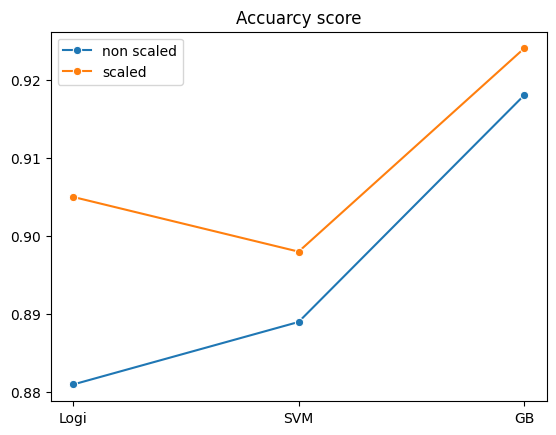

In [ ]:
plt.title('Accuarcy score')
labels = ['non scaled', 'scaled']
for _, label in enumerate(labels):
  if _ == 0:
    x = non_scaled_acc_list.keys()
    y = non_scaled_acc_list.values()
  elif _ == 1:
    x = scaled_acc_list.keys()
    y = scaled_acc_list.values()
  sns.lineplot(x=x, y=y, label=label,linestyle='-', marker='o')
  plt.legend()

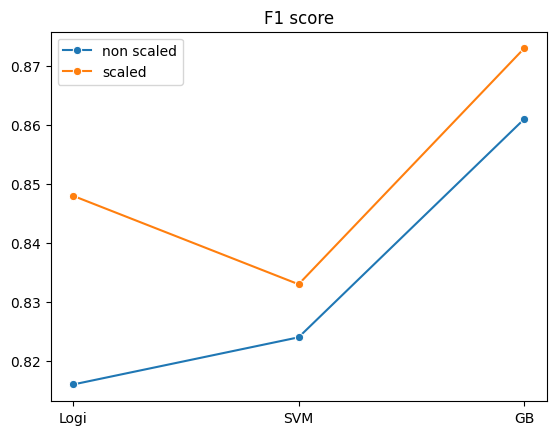

In [ ]:
plt.title('F1 score')
labels = ['non scaled', 'scaled']
for _, label in enumerate(labels):
  if _ == 0:
    x = non_scaled_f1_list.keys()
    y = non_scaled_f1_list.values()
  elif _ == 1:
    x = scaled_f1_list.keys()
    y = scaled_f1_list.values()
  sns.lineplot(x=x, y=y, label=label,linestyle='-', marker='o')
  plt.legend()

## Modeling

In [ ]:
X_train, X_test, y_train, y_test = scaled_X_train, scaled_X_test, scaled_y_train, scaled_y_test

In [ ]:
X_train.sample(5)

,2nd weighted grade,1st weighted grade,grade increase,2nd grade,1st grade,unemployment rate,2nd approved,1st approved,2nd evaluations,1st evaluations,enrollment age,2nd enrolled,1st enrolled,application mode,application order,course,previous qualification,nationality,mother qualification,father qualification,mother occupation,father occupation,displaced,special,debtor,fees up to date,gender,scholarship
1611,0.488759,0.463242,0.928358,0.417939,0.189797,0.311308,0.506311,0.503912,0.431838,0.787188,-0.503477,0.711787,0.838956,9,1,16,1,1,13,28,5,1,1,0,0,1,0,0
951,-0.239752,0.127535,-1.129268,0.550292,0.840154,-1.530787,-0.344138,-0.391068,-0.969414,-1.019504,-0.350929,-1.159661,-1.179726,1,1,14,1,1,1,1,3,3,1,0,0,1,0,0
2681,0.215567,-0.136628,0.562558,0.607015,0.472894,-0.840001,0.081086,0.056422,-0.969414,-1.019504,-0.503477,-1.159661,-1.179726,8,2,14,1,1,3,1,4,2,0,0,0,1,0,0
2405,0.336986,0.068098,0.135791,0.228863,0.197449,-0.840001,0.506311,0.056422,-0.619101,-0.296827,3.157671,-0.223937,-0.170385,12,1,3,3,1,22,27,10,10,0,0,0,1,0,1
176,-0.148689,-0.433811,0.013857,0.062476,0.059726,0.311308,0.081086,0.056422,-0.969414,-0.296827,-0.503477,-1.159661,-1.179726,9,1,9,1,1,13,3,6,6,1,0,0,1,0,1


In [ ]:
X_train.columns

Index(['2nd weighted grade', '1st weighted grade', 'grade increase',
       '2nd grade', '1st grade', 'unemployment rate', '2nd approved',
       '1st approved', '2nd evaluations', '1st evaluations', 'enrollment age',
       '2nd enrolled', '1st enrolled', 'application mode', 'application order',
       'course', 'previous qualification', 'nationality',
       'mother qualification', 'father qualification', 'mother occupation',
       'father occupation', 'displaced', 'special', 'debtor',
       'fees up to date', 'gender', 'scholarship'],
      dtype='object')

In [ ]:
X_train.isna().sum()

2nd weighted grade        0
1st weighted grade        0
grade increase            0
2nd grade                 0
1st grade                 0
unemployment rate         0
2nd approved              0
1st approved              0
2nd evaluations           0
1st evaluations           0
enrollment age            0
2nd enrolled              0
1st enrolled              0
application mode          0
application order         0
course                    0
previous qualification    0
nationality               0
mother qualification      0
father qualification      0
mother occupation         0
father occupation         0
displaced                 0
special                   0
debtor                    0
fees up to date           0
gender                    0
scholarship               0
dtype: int64

# 피처 중요도 확인

## DT

In [ ]:
# Decision Tree
dt_clf = DecisionTreeClassifier(random_state=42)

dt_clf.fit(X_train, y_train)
y_pred_dt = dt_clf.predict(X_test)

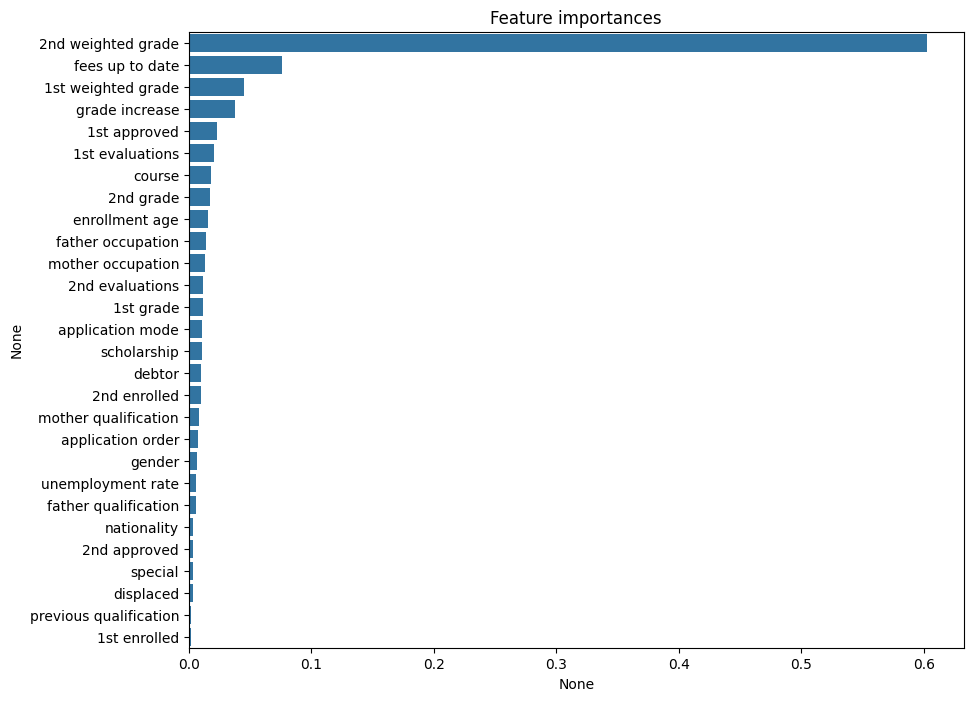

In [ ]:
importance_values = dt_clf.feature_importances_

importance_values = pd.Series(importance_values, index=X_train.columns).sort_values(ascending=False)

plt.figure(figsize=(10,8))
plt.title("Feature importances")
sns.barplot(x=importance_values, y=importance_values.index)
plt.show()

## LGBM

In [ ]:
# lgbm
lgb_clf = lgb.LGBMClassifier(random_state = 42)

lgb_clf.fit(X_train, y_train)
y_pred_lgb = lgb_clf.predict(X_test)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 742, number of negative: 1561
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000564 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1550
[LightGBM] [Info] Number of data points in the train set: 2303, number of used features: 28
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.322188 -> initscore=-0.743733
[LightGBM] [Info] Start training from score -0.743733


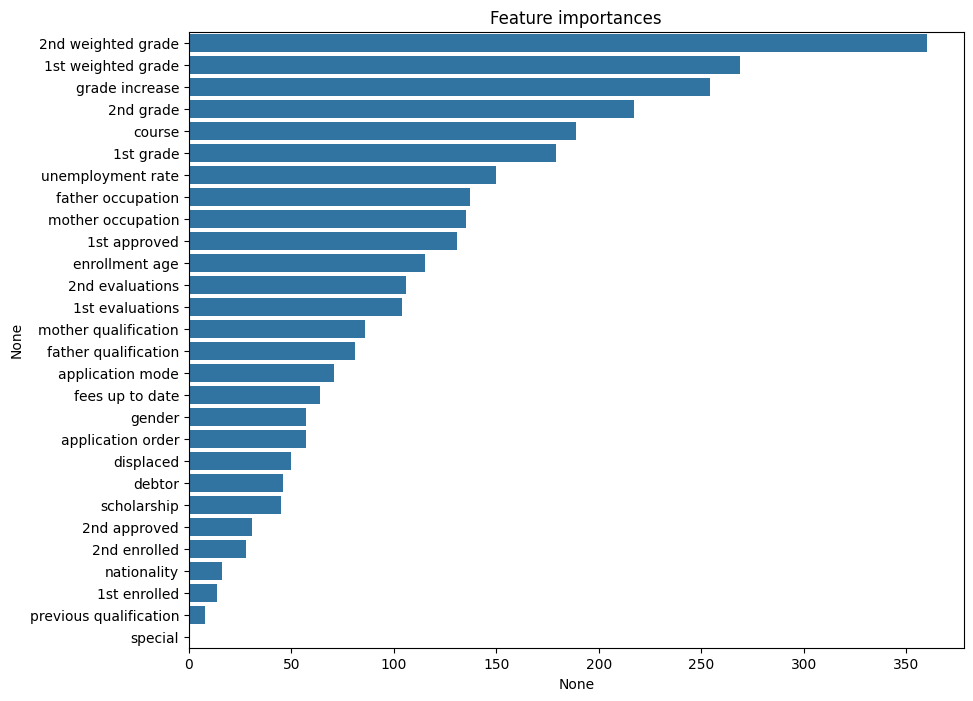

In [ ]:
importance_values = lgb_clf.feature_importances_

importance_values = pd.Series(importance_values, index=X_train.columns).sort_values(ascending=False)

plt.figure(figsize=(10,8))
plt.title("Feature importances")
sns.barplot(x=importance_values, y=importance_values.index)
plt.show()

## RF

In [ ]:
# RandomForest
rf_clf = RandomForestClassifier(random_state = 42)

rf_clf.fit(X_train, y_train)
y_pred_rf = rf_clf.predict(X_test)

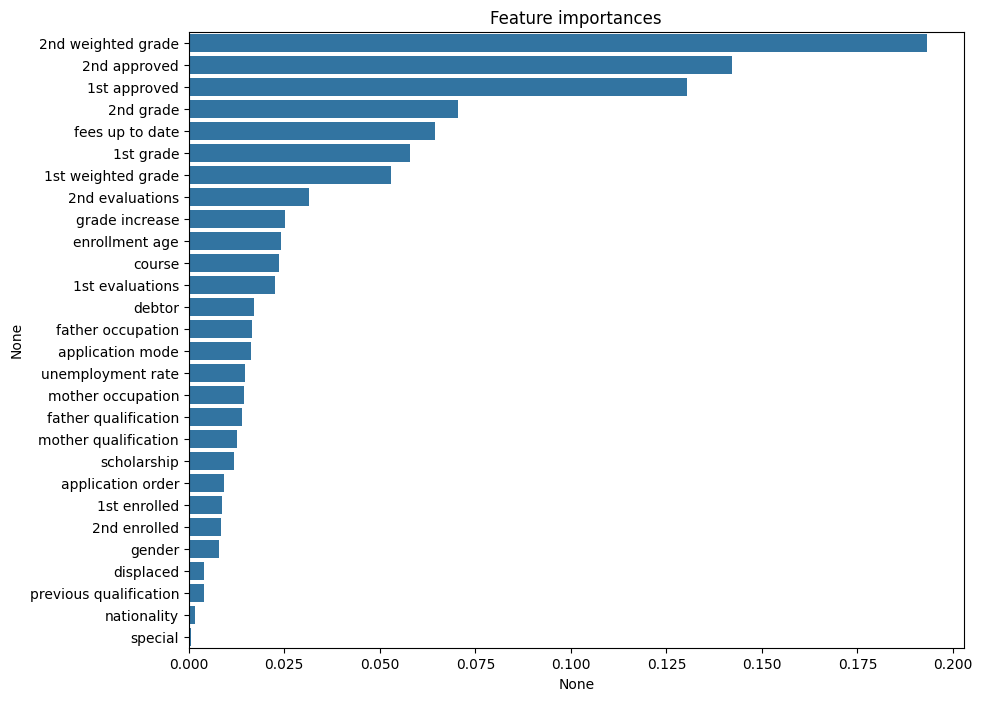

In [ ]:
importance_values = rf_clf.feature_importances_

importance_values = pd.Series(importance_values, index=X_train.columns).sort_values(ascending=False)

plt.figure(figsize=(10,8))
plt.title("Feature importances")
sns.barplot(x=importance_values, y=importance_values.index)
plt.show()

# Modeling

In [ ]:
acc_list = {'Logi' : 0, 'B_Logi' : 0, 'SVM' : 0,'B_SVM' : 0, 'KNN' : 0, 'DT' : 0, 'RF':0, 'GB' : 0, 'XGB' : 0, 'LGBM':0, 'ADA' : 0, 'Voting' : 0}
f1_list = {'Logi' : 0, 'B_Logi' : 0, 'SVM' : 0,'B_SVM' : 0, 'KNN' : 0, 'DT' : 0, 'RF':0, 'GB' : 0, 'XGB' : 0, 'LGBM':0, 'ADA' : 0, 'Voting' : 0}
tr_acc_list = {'Logi' : 0, 'B_Logi' : 0, 'SVM' : 0,'B_SVM' : 0, 'KNN' : 0, 'DT' : 0, 'RF':0, 'GB' : 0, 'XGB' : 0, 'LGBM':0, 'ADA' : 0, 'Voting' : 0}
tr_f1_list = {'Logi' : 0, 'B_Logi' : 0, 'SVM' : 0,'B_SVM' : 0, 'KNN' : 0, 'DT' : 0, 'RF':0, 'GB' : 0, 'XGB' : 0, 'LGBM':0, 'ADA' : 0, 'Voting' : 0}

### Logistic Regression

In [ ]:
logi = LogisticRegression(random_state=42)

In [ ]:
tr_acc_list['Logi'], tr_f1_list['Logi'], acc_list['Logi'], f1_list['Logi'] = get_over_kfold_metrics(logi, X_train, y_train)
print(tr_acc_list['Logi'], tr_f1_list['Logi'], acc_list['Logi'], f1_list['Logi'])

데이터 증강 전 타겟 1: 594
데이터 증강 전 타겟 0: 1248
데이터 증강 후 타겟 1: 1248
데이터 증강 후 타겟 0: 1248
0.91 0.907 0.905 0.848


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### Logistic (Bagging)

In [ ]:
logi_bagging_clf = BaggingClassifier(
    base_estimator = LogisticRegression(random_state = 42), random_state=42)

In [ ]:
tr_acc_list['B_Logi'], tr_f1_list['B_Logi'], acc_list['B_Logi'], f1_list['B_Logi'] = get_over_kfold_metrics(logi_bagging_clf, X_train, y_train)
print(tr_acc_list['B_Logi'], tr_f1_list['B_Logi'], acc_list['B_Logi'], f1_list['B_Logi'])

데이터 증강 전 타겟 1: 594
데이터 증강 전 타겟 0: 1248


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


데이터 증강 후 타겟 1: 1248
데이터 증강 후 타겟 0: 1248


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

0.913 0.91 0.902 0.845


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### SVM

In [ ]:
svm = SVC(random_state=42)

In [ ]:
tr_acc_list['SVM'], tr_f1_list['SVM'], acc_list['SVM'], f1_list['SVM'] = get_over_kfold_metrics(svm, X_train, y_train)
print(tr_acc_list['SVM'], tr_f1_list['SVM'], acc_list['SVM'], f1_list['SVM'])

데이터 증강 전 타겟 1: 594
데이터 증강 전 타겟 0: 1248
데이터 증강 후 타겟 1: 1248
데이터 증강 후 타겟 0: 1248
0.898 0.892 0.898 0.833


### SVM(Bagging)

In [ ]:
svm_bagging_clf = BaggingClassifier(
    base_estimator = SVC(random_state = 42), random_state=42)

In [ ]:
tr_acc_list['B_SVM'], tr_f1_list['B_SVM'], acc_list['B_SVM'], f1_list['B_SVM'] = get_over_kfold_metrics(svm_bagging_clf, X_train, y_train)
print(tr_acc_list['B_SVM'], tr_f1_list['B_SVM'], acc_list['B_SVM'], f1_list['B_SVM'])

데이터 증강 전 타겟 1: 594
데이터 증강 전 타겟 0: 1248
데이터 증강 후 타겟 1: 1248
데이터 증강 후 타겟 0: 1248


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


0.898 0.893 0.896 0.83


### KNN

In [ ]:
knn = KNeighborsClassifier()

In [ ]:
tr_acc_list['KNN'], tr_f1_list['KNN'], acc_list['KNN'], f1_list['KNN'] = get_over_kfold_metrics(knn, X_train, y_train)
print(tr_acc_list['KNN'], tr_f1_list['KNN'], acc_list['KNN'], f1_list['KNN'])

데이터 증강 전 타겟 1: 594
데이터 증강 전 타겟 0: 1248
데이터 증강 후 타겟 1: 1248
데이터 증강 후 타겟 0: 1248
0.907 0.909 0.798 0.71


### Decision Tree

In [ ]:
dt_clf = DecisionTreeClassifier(random_state=42)

In [ ]:
tr_acc_list['DT'], tr_f1_list['DT'], acc_list['DT'], f1_list['DT'] = get_over_kfold_metrics(dt_clf, X_train, y_train)
print(tr_acc_list['DT'], tr_f1_list['DT'], acc_list['DT'], f1_list['DT'])

데이터 증강 전 타겟 1: 594
데이터 증강 전 타겟 0: 1248
데이터 증강 후 타겟 1: 1248
데이터 증강 후 타겟 0: 1248
1.0 1.0 0.855 0.78


### Random Forest

In [ ]:
rf_clf = RandomForestClassifier(random_state = 42)

In [ ]:
tr_acc_list['RF'], tr_f1_list['RF'], acc_list['RF'], f1_list['RF'] = get_over_kfold_metrics(rf_clf, X_train, y_train)
print(tr_acc_list['RF'], tr_f1_list['RF'], acc_list['RF'], f1_list['RF'])

데이터 증강 전 타겟 1: 594
데이터 증강 전 타겟 0: 1248
데이터 증강 후 타겟 1: 1248
데이터 증강 후 타겟 0: 1248
1.0 1.0 0.922 0.871


# GradientBoost

In [ ]:
gb_clf = GradientBoostingClassifier(random_state=42)

In [ ]:
tr_acc_list['GB'], tr_f1_list['GB'], acc_list['GB'], f1_list['GB'] = get_over_kfold_metrics(gb_clf, X_train, y_train)
print(tr_acc_list['GB'], tr_f1_list['GB'], acc_list['GB'], f1_list['GB'])

데이터 증강 전 타겟 1: 594
데이터 증강 전 타겟 0: 1248
데이터 증강 후 타겟 1: 1248
데이터 증강 후 타겟 0: 1248
0.963 0.962 0.924 0.873


### XGBoost

In [ ]:
xgb_clf = xgb.XGBClassifier(random_state=42)

In [ ]:
tr_acc_list['XGB'], tr_f1_list['XGB'], acc_list['XGB'], f1_list['XGB'] = get_over_kfold_metrics(xgb_clf, X_train, y_train)
print(tr_acc_list['XGB'], tr_f1_list['XGB'], acc_list['XGB'], f1_list['XGB'])

데이터 증강 전 타겟 1: 594
데이터 증강 전 타겟 0: 1248
데이터 증강 후 타겟 1: 1248
데이터 증강 후 타겟 0: 1248
1.0 1.0 0.911 0.851


### LGBM

In [ ]:
lgb_clf = lgb.LGBMClassifier(random_state = 42)

In [ ]:
tr_acc_list['LGBM'], tr_f1_list['LGBM'], acc_list['LGBM'], f1_list['LGBM'] = get_over_kfold_metrics(lgb_clf, X_train, y_train)
print(tr_acc_list['LGBM'], tr_f1_list['LGBM'], acc_list['LGBM'], f1_list['LGBM'])

데이터 증강 전 타겟 1: 594
데이터 증강 전 타겟 0: 1248
데이터 증강 후 타겟 1: 1248
데이터 증강 후 타겟 0: 1248
[LightGBM] [Info] Number of positive: 1248, number of negative: 1248
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000433 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5600
[LightGBM] [Info] Number of data points in the train set: 2496, number of used features: 28
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
1.0 1.0 0.92 0.862


### AdaBoost

In [ ]:
ada_clf = AdaBoostClassifier(random_state=42)

In [ ]:
tr_acc_list['ADA'], tr_f1_list['ADA'], acc_list['ADA'], f1_list['ADA'] = get_over_kfold_metrics(lgb_clf, X_train, y_train)
print(tr_acc_list['ADA'], tr_f1_list['ADA'], acc_list['ADA'], f1_list['ADA'])

데이터 증강 전 타겟 1: 594
데이터 증강 전 타겟 0: 1248
데이터 증강 후 타겟 1: 1248
데이터 증강 후 타겟 0: 1248
[LightGBM] [Info] Number of positive: 1248, number of negative: 1248
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000443 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5600
[LightGBM] [Info] Number of data points in the train set: 2496, number of used features: 28
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
1.0 1.0 0.92 0.862


### Voting(Soft) - LGBM,GB,RF,ADA

In [ ]:
vo_clf = VotingClassifier(estimators=[('lgbm',lgb_clf), ('gb',gb_clf), ('rf', rf_clf), ('ada', ada_clf)], voting='soft')

In [ ]:
tr_acc_list['Voting'], tr_f1_list['Voting'], acc_list['Voting'], f1_list['Voting'] = get_over_kfold_metrics(vo_clf, X_train, y_train)
print(tr_acc_list['Voting'], tr_f1_list['Voting'], acc_list['Voting'], f1_list['Voting'])

데이터 증강 전 타겟 1: 594
데이터 증강 전 타겟 0: 1248
데이터 증강 후 타겟 1: 1248
데이터 증강 후 타겟 0: 1248
[LightGBM] [Info] Number of positive: 1248, number of negative: 1248
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000618 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5600
[LightGBM] [Info] Number of data points in the train set: 2496, number of used features: 28
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
0.998 0.998 0.922 0.868


### Result

In [ ]:
print('ACC\n', acc_list)

ACC
 {'Logi': 0.905, 'B_Logi': 0.902, 'SVM': 0.898, 'B_SVM': 0.896, 'KNN': 0.798, 'DT': 0.855, 'RF': 0.922, 'GB': 0.924, 'XGB': 0.911, 'LGBM': 0.92, 'ADA': 0.92, 'Voting': 0.922}


In [ ]:
print('ACC\n', tr_acc_list)

ACC
 {'Logi': 0.91, 'B_Logi': 0.913, 'SVM': 0.898, 'B_SVM': 0.898, 'KNN': 0.907, 'DT': 1.0, 'RF': 1.0, 'GB': 0.963, 'XGB': 1.0, 'LGBM': 1.0, 'ADA': 1.0, 'Voting': 0.998}


In [ ]:
print('F1\n', f1_list)

F1
 {'Logi': 0.848, 'B_Logi': 0.845, 'SVM': 0.833, 'B_SVM': 0.83, 'KNN': 0.71, 'DT': 0.78, 'RF': 0.871, 'GB': 0.873, 'XGB': 0.851, 'LGBM': 0.862, 'ADA': 0.862, 'Voting': 0.868}


In [ ]:
print('F1\n', tr_f1_list)

F1
 {'Logi': 0.907, 'B_Logi': 0.91, 'SVM': 0.892, 'B_SVM': 0.893, 'KNN': 0.909, 'DT': 1.0, 'RF': 1.0, 'GB': 0.962, 'XGB': 1.0, 'LGBM': 1.0, 'ADA': 1.0, 'Voting': 0.998}


### Hard Voting의 성능은?

In [ ]:
h_vo_clf = VotingClassifier(estimators=[('rf', rf_clf), ('gb',gb_clf), ('lgbm',lgb_clf), ('ada', ada_clf)], voting='hard')

In [ ]:
print(get_over_kfold_metrics(rf_clf, X_train, y_train))

데이터 증강 전 타겟 1: 594
데이터 증강 전 타겟 0: 1248
데이터 증강 후 타겟 1: 1248
데이터 증강 후 타겟 0: 1248
(1.0, 1.0, 0.922, 0.871)


## (오버 샘플링 + K-FOLD) 데이터 모델별 성능 비교

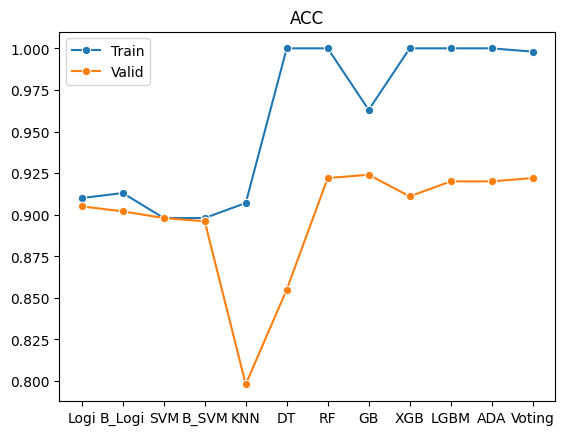

In [ ]:
plt.title('ACC')
labels = ['Train', 'Valid']
for _ , label in enumerate(labels):
  if  _ == 0:
    x = tr_acc_list.keys()
    y = tr_acc_list.values()
  elif _ == 1:
    x = acc_list.keys()
    y = acc_list.values()
  sns.lineplot(x=x, y=y, label=label,linestyle='-', marker='o')
  plt.legend()

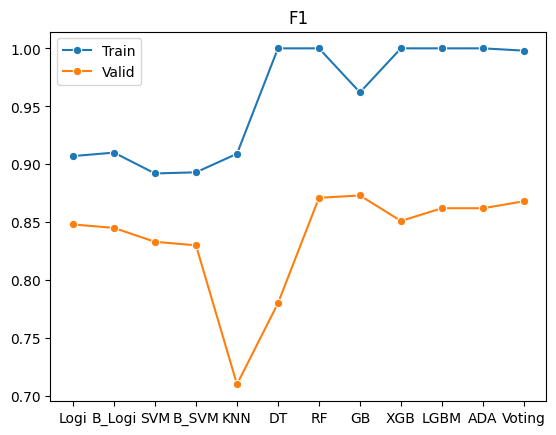

In [ ]:
plt.title('F1')
labels = ['Train', 'Valid']
for _ , label in enumerate(labels):
  if  _ == 0:
    x = tr_f1_list.keys()
    y = tr_f1_list.values()
  elif _ == 1:
    x = f1_list.keys()
    y = f1_list.values()
  sns.lineplot(x=x, y=y, label=label,linestyle='-', marker='o')
  plt.legend()

# 하이퍼파라미터 튜닝

In [ ]:
fin_acc_list = {'RF' : 0, 'GB' : 0, 'LGBM': 0, 'ADA' : 0, 'Voting' : 0}
fin_f1_list = {'RF' : 0, 'GB' : 0, 'LGBM': 0, 'ADA' : 0, 'Voting' : 0}
tr_fin_acc_list = {'RF' : 0, 'GB' : 0, 'LGBM': 0, 'ADA' : 0, 'Voting' : 0}
tr_fin_f1_list = {'RF' : 0, 'GB' : 0, 'LGBM': 0, 'ADA' : 0, 'Voting' : 0}

## Data Oversampling

In [ ]:
smote = SMOTE(random_state=42)
X_train_over, y_train_over = smote.fit_resample(X_train, y_train)

## Random Forest

In [ ]:
params_rf = { 'n_estimators' : [100,300],
           'max_depth':range(3,13,2),
           'min_samples_leaf' : [1, 8, 12, 18],
           'min_samples_split' : [2, 8, 16, 20]
            }

grid_search_rf = GridSearchCV(rf_clf, param_grid = params_rf, scoring='accuracy', cv = 5, n_jobs = -1, verbose=10)
grid_search_rf.fit(X_train_over, y_train_over)
grid_search_rf.cv_results_, grid_search_rf.best_params_, grid_search_rf.best_score_

Fitting 5 folds for each of 160 candidates, totalling 800 fits


({'mean_fit_time': array([0.56969595, 1.76583505, 0.35124183, 1.02697692, 0.35036039,
         1.00511494, 0.34165325, 1.28447227, 0.54661903, 1.59168582,
         0.34080124, 1.02884235, 0.34022946, 1.28762712, 0.34535651,
         1.74979572, 0.65170765, 1.96395049, 0.43697648, 1.04412498,
         0.3681397 , 1.04384561, 0.3420579 , 1.37010369, 0.58639083,
         1.50994558, 0.35081916, 1.00802698, 0.34523635, 1.00501308,
         0.34141197, 1.68146067, 1.17933517, 2.16983709, 0.78353934,
         3.2139668 , 0.87420812, 2.40562282, 0.95134077, 2.06357431,
         0.47559657, 1.19553919, 0.40245881, 1.21063499, 0.39746652,
         1.86680088, 0.68188281, 1.19291081, 0.40005841, 1.20065541,
         0.40440955, 1.98796649, 0.72263989, 1.35139446, 0.40747995,
         1.18482652, 0.38574219, 1.35179358, 0.67637167, 1.75257802,
         0.39144073, 1.16465788, 0.38833795, 1.17197728, 0.62791996,
         2.25231509, 0.48524652, 1.36736546, 0.45175838, 1.59699664,
         0.823156

In [ ]:
tr_rf_result = grid_search_rf.predict(X_train_over)
rf_result = grid_search_rf.predict(X_test)

In [ ]:
fin_acc_list['RF'] = accuracy_score(y_test, rf_result)
fin_f1_list['RF'] = f1_score(y_test, rf_result)
tr_fin_acc_list['RF'] = accuracy_score(y_train_over, tr_rf_result)
tr_fin_f1_list['RF'] = f1_score(y_train_over, tr_rf_result)
print(tr_fin_acc_list['RF'], tr_fin_f1_list['RF'], fin_acc_list['RF'], fin_f1_list['RF'])

0.9756566303651505 0.9750492449113591 0.9079861111111112 0.846376811594203


## GB

In [ ]:
param_gb = {
 'learning_rate' : [0.0001, 0.001, 0.01, 0.1, 1.0],
 'n_estimators': [100, 300],
 'max_depth':range(3,13,3),
 'subsample' : [0.5, 0.7, 1.0]
}
grid_search_gb = GridSearchCV(estimator=gb_clf, param_grid=param_gb, n_jobs=-1, cv=5)
grid_search_gb.fit(X_train_over, y_train_over)
grid_search_gb.cv_results_, grid_search_gb.best_params_, grid_search_gb.best_score_

({'mean_fit_time': array([ 0.62418327,  0.78701968,  0.98204355,  2.38710012,  2.87143588,
          3.2958694 ,  1.93188281,  1.5007103 ,  1.83815351,  4.61790776,
          5.69617529,  6.63388824,  1.99903483,  3.6274889 ,  2.54748249,
          7.44088097, 10.30474124,  9.18649263,  3.84774866,  3.72681861,
          3.96261282, 10.65321226, 13.65968313, 11.02811208,  0.64053907,
          1.37702603,  1.00505385,  1.82327466,  3.10172863,  3.20724945,
          1.20111556,  2.55962124,  2.01259899,  5.75728817,  5.6205792 ,
          6.52308593,  2.24810023,  3.25753341,  2.91793666,  7.16778874,
          9.50266757,  9.20053425,  3.40465493,  4.26270132,  4.23771362,
         10.87028522, 14.30066066, 11.46202197,  0.62722754,  1.02068925,
          1.67544727,  1.8320405 ,  2.44117675,  3.83685107,  1.19467897,
          1.91498919,  2.6853806 ,  4.01832428,  5.14468193,  7.21699972,
          2.64923797,  2.56797476,  3.82974811,  7.17452335, 10.04615426,
         10.69118948,

In [ ]:
tr_gb_result = grid_search_gb.predict(X_train_over)
gb_result = grid_search_gb.predict(X_test)

In [ ]:
fin_acc_list['GB'] = accuracy_score(y_test, gb_result)
fin_f1_list['GB'] = f1_score(y_test, gb_result)
tr_fin_acc_list['GB'] = accuracy_score(y_train_over, tr_gb_result)
tr_fin_f1_list['GB'] = f1_score(y_train_over, tr_gb_result)
print(tr_fin_acc_list['GB'], tr_fin_f1_list['GB'], fin_acc_list['GB'], fin_f1_list['GB'])

1.0 1.0 0.90625 0.8421052631578947


## LGBM

In [ ]:
params_lgbm = {
    'learning_rate' : [0.1, 0.05, 0.03, 0.01],
    'max_depth':range(3,13,3),
    'min_child_weight':range(1,6,2),
    'gamma':[i/10.0 for i in range(0,5)]}
grid_search_lgbm = GridSearchCV(estimator=lgb.LGBMClassifier(learning_rate=0.1, n_estimators=1000, max_depth=5, min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8, nthread=-1, scale_pos_weight=1, random_state = 42),
                                param_grid = params_lgbm, scoring='accuracy',n_jobs=-1, cv=5, verbose=10)
grid_search_lgbm.fit(X_train_over, y_train_over)
grid_search_lgbm.cv_results_, grid_search_lgbm.best_params_, grid_search_lgbm.best_score_

Fitting 5 folds for each of 240 candidates, totalling 1200 fits
[LightGBM] [Warning] Unknown parameter: gamma
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Unknown parameter: gamma
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 1561, number of negative: 1561
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001036 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3278
[LightGBM] [Info] Number of data points in the train set: 3122, number of used features: 28
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain

({'mean_fit_time': array([1.14186249, 1.09521208, 1.07823224, 1.29485908, 1.10529928,
         1.08788738, 1.68535256, 1.63342566, 1.09136882, 1.18928351,
         1.20819478, 1.5128252 , 1.22883887, 0.82184887, 0.81598482,
         1.52908316, 1.59168224, 1.95656505, 1.56160488, 1.38046522,
         1.55997992, 2.35816636, 1.39142275, 1.35194798, 0.84774771,
         1.2019258 , 1.26936736, 1.737356  , 1.45780053, 1.568888  ,
         2.66584888, 1.59329581, 1.47501283, 2.78520284, 2.44489384,
         1.50460701, 0.85802975, 1.1409687 , 1.32060566, 2.09445853,
         1.77670245, 2.24129782, 2.73589783, 2.13914061, 2.86660829,
         2.39262052, 2.60853667, 2.56761999, 0.78052678, 0.8286478 ,
         0.82302265, 1.50355377, 1.59787474, 1.07435555, 1.16234827,
         1.11490932, 1.39950976, 1.90074139, 1.19282837, 1.08313694,
         0.84546065, 0.86308823, 1.09549885, 1.86834521, 1.31629586,
         1.2950408 , 1.84527092, 2.00204024, 1.3057147 , 1.54354367,
         1.727691

In [ ]:
tr_lgbm_result = grid_search_lgbm.predict(X_train_over)
lgbm_result = grid_search_lgbm.predict(X_test)

[LightGBM] [Warning] Unknown parameter: gamma
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Unknown parameter: gamma
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


In [ ]:
fin_acc_list['LGBM'] = accuracy_score(y_test, lgbm_result)
fin_f1_list['LGBM'] = f1_score(y_test, lgbm_result)
tr_fin_acc_list['LGBM'] = accuracy_score(y_train_over, tr_lgbm_result)
tr_fin_f1_list['LGBM'] = f1_score(y_train_over, tr_lgbm_result)
print(tr_fin_acc_list['LGBM'], tr_fin_f1_list['LGBM'], fin_acc_list['LGBM'], fin_f1_list['LGBM'])

1.0 1.0 0.9097222222222222 0.8488372093023255


## AdaBoost

In [ ]:
params_ada = {
    'learning_rate' : [0.0001, 0.001, 0.01, 0.1, 1.0],
    'n_estimators' : [10, 50, 100, 500]
}
grid_search_ada = GridSearchCV(ada_clf, param_grid=params_ada, scoring='accuracy', cv=5, verbose=10)
grid_search_ada.fit(X_train_over, y_train_over)
grid_search_ada.cv_results_, grid_search_ada.best_params_, grid_search_ada.best_score_

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV 1/5; 1/20] START learning_rate=0.0001, n_estimators=10......................
[CV 1/5; 1/20] END learning_rate=0.0001, n_estimators=10;, score=0.858 total time=   0.1s
[CV 2/5; 1/20] START learning_rate=0.0001, n_estimators=10......................
[CV 2/5; 1/20] END learning_rate=0.0001, n_estimators=10;, score=0.837 total time=   0.0s
[CV 3/5; 1/20] START learning_rate=0.0001, n_estimators=10......................
[CV 3/5; 1/20] END learning_rate=0.0001, n_estimators=10;, score=0.880 total time=   0.1s
[CV 4/5; 1/20] START learning_rate=0.0001, n_estimators=10......................
[CV 4/5; 1/20] END learning_rate=0.0001, n_estimators=10;, score=0.918 total time=   0.1s
[CV 5/5; 1/20] START learning_rate=0.0001, n_estimators=10......................
[CV 5/5; 1/20] END learning_rate=0.0001, n_estimators=10;, score=0.877 total time=   0.1s
[CV 1/5; 2/20] START learning_rate=0.0001, n_estimators=50......................
[C

({'mean_fit_time': array([0.0478663 , 0.21741915, 0.42480183, 2.41800585, 0.04698195,
         0.21056266, 0.41704431, 2.37019777, 0.04702277, 0.2122848 ,
         0.41591516, 2.35390854, 0.04612961, 0.20935526, 0.41390948,
         2.38586817, 0.0454947 , 0.20894113, 0.4119863 , 2.44524651]),
  'std_fit_time': array([0.00275954, 0.00600643, 0.01430933, 0.37708702, 0.00491151,
         0.00612944, 0.01116525, 0.37757118, 0.00217435, 0.00747246,
         0.01288389, 0.44906096, 0.00190842, 0.00751862, 0.00986279,
         0.47374401, 0.00182074, 0.00584165, 0.01242393, 0.44583887]),
  'mean_score_time': array([0.00428619, 0.01228209, 0.02228179, 0.11813073, 0.00479894,
         0.01255713, 0.02047534, 0.11542497, 0.00473003, 0.01242142,
         0.02102861, 0.11667299, 0.00537405, 0.0135397 , 0.02205558,
         0.12525778, 0.00428128, 0.01318159, 0.02164254, 0.1264389 ]),
  'std_score_time': array([5.20088367e-05, 7.78775016e-04, 1.68422530e-03, 2.99411058e-02,
         7.34758335e-04

In [ ]:
tr_ada_result = grid_search_ada.predict(X_train_over)
ada_result = grid_search_ada.predict(X_test)

In [ ]:
fin_acc_list['ADA'] = accuracy_score(y_test, ada_result)
fin_f1_list['ADA'] = f1_score(y_test, ada_result)
tr_fin_acc_list['ADA'] = accuracy_score(y_train_over, tr_ada_result)
tr_fin_f1_list['ADA'] = f1_score(y_train_over, tr_ada_result)
print(tr_fin_acc_list['ADA'] , tr_fin_f1_list['ADA'], fin_acc_list['ADA'], fin_f1_list['ADA'])

0.9295323510570147 0.9272486772486772 0.9010416666666666 0.841225626740947


## Voting - RF,GB,LGBM,ADA

In [ ]:
tuning_vo_clf = VotingClassifier(estimators=[('rf', grid_search_rf), ('gb',grid_search_gb), ('lgbm',grid_search_lgbm), ('ada', grid_search_ada)], voting='soft')

In [ ]:
tuning_vo_clf.fit(X_train_over, y_train_over)

Fitting 5 folds for each of 160 candidates, totalling 800 fits
Fitting 5 folds for each of 240 candidates, totalling 1200 fits
[LightGBM] [Warning] Unknown parameter: gamma
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Unknown parameter: gamma
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 1561, number of negative: 1561
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000976 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3278
[LightGBM] [Info] Number of data points in the train set: 3122, number of used features: 28
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[Ligh

VotingClassifier(estimators=[('rf',
                              GridSearchCV(cv=5,
                                           estimator=RandomForestClassifier(random_state=42),
                                           n_jobs=-1,
                                           param_grid={'max_depth': range(3, 13, 2),
                                                       'min_samples_leaf': [1,
                                                                            8,
                                                                            12,
                                                                            18],
                                                       'min_samples_split': [2,
                                                                             8,
                                                                             16,
                                                                             20],
                                                       'n_estimators': [100,
                                                                        300]},
                                           scoring='accuracy', verbose=10)),
                             ('gb',
                              GridSearchCV(cv=5,
                                           estimator=GradientBoostingClassifier(random_state=42),...
                                           param_grid={'gamma': [0.0, 0.1, 0.2,
                                                                 0.3, 0.4],
                                                       'learning_rate': [0.1,
                                                                         0.05,
                                                                         0.03,
                                                                         0.01],
                                                       'max_depth': range(3, 13, 3),
                                                       'min_child_weight': range(1, 6, 2)},
                                           scoring='accuracy', verbose=10)),
                             ('ada',
                              GridSearchCV(cv=5,
                                           estimator=AdaBoostClassifier(random_state=42),
                                           param_grid={'learning_rate': [0.0001,
                                                                         0.001,
                                                                         0.01,
                                                                         0.1,
                                                                         1.0],
                                                       'n_estimators': [10, 50,
                                                                        100,
                                                                        500]},
                                           scoring='accuracy', verbose=10))],
                 voting='soft')

In [ ]:
tr_vo_result = tuning_vo_clf.predict(X_train_over)
vo_result = tuning_vo_clf.predict(X_test)

[LightGBM] [Warning] Unknown parameter: gamma
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Unknown parameter: gamma
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


In [ ]:
fin_acc_list['Voting'] = accuracy_score(y_test, vo_result)
fin_f1_list['Voting'] = f1_score(y_test, vo_result)
tr_fin_acc_list['Voting'] = accuracy_score(y_train_over, tr_vo_result)
tr_fin_f1_list['Voting'] = f1_score(y_train_over, tr_vo_result)
print(fin_acc_list['Voting'], fin_f1_list['Voting'])

0.9079861111111112 0.8436578171091446


# 최종 성능 비교

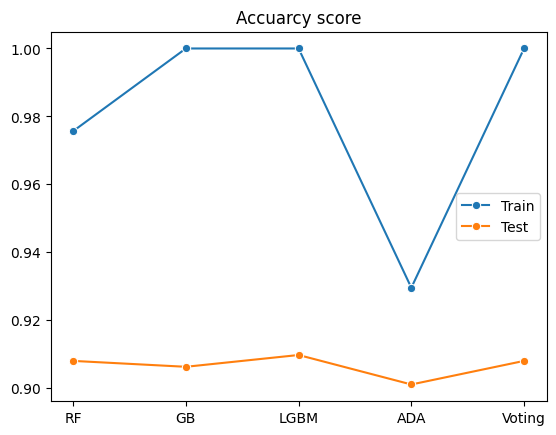

In [ ]:
plt.title('Accuarcy score')
labels = ['Train', 'Test']
for _ , label in enumerate(labels):
  if _ == 0:
    x = tr_fin_acc_list.keys()
    y = tr_fin_acc_list.values()
  elif _ == 1:
    x = fin_acc_list.keys()
    y = fin_acc_list.values()
  sns.lineplot(x=x, y=y, label=label,linestyle='-', marker='o')
  plt.legend()

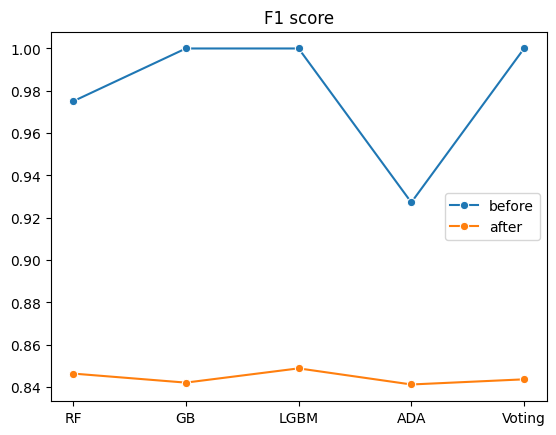

In [ ]:
plt.title('F1 score')
labels = ['before', 'after']
for _ , label in enumerate(labels):
  if _ == 0:
    x = tr_fin_f1_list.keys()
    y = tr_fin_f1_list.values()
  elif _ == 1:
    x = fin_f1_list.keys()
    y = fin_f1_list.values()
  sns.lineplot(x=x, y=y, label=label,linestyle='-', marker='o')
  plt.legend()

In [ ]:
fin_acc_list

{'RF': 0.9079861111111112,
 'GB': 0.90625,
 'LGBM': 0.9097222222222222,
 'ADA': 0.9010416666666666,
 'Voting': 0.9079861111111112}

In [ ]:
fin_f1_list

{'RF': 0.846376811594203,
 'GB': 0.8421052631578947,
 'LGBM': 0.8488372093023255,
 'ADA': 0.841225626740947,
 'Voting': 0.8436578171091446}